## Project Name: House Prices: Advanced Regression Techniques

### The main aim of this project is to predict the house price based on various features

-----------------------------------------------------------------------------

### **Data Analysis Phase**

The goal of this phase is to understand the dataset in detail — explore patterns, identify data quality issues, and uncover relationships between the features and the target variable.

In [3]:
# Import core data analysis libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [4]:
## load the training dataset
dataset = pd.read_csv('train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


It means:

- 1,460 house entries
- 80 features + 1 target variable (SalePrice)

In [5]:
## print the top5 records
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Things to Observe in the Output:
1. Feature Types:
    - MSZoning, Street, Alley, Neighborhood, etc. are categorical
    - LotArea, YearBuilt, GrLivArea, etc. are numerical
    - SalePrice is the target variable (what we're predicting)

2. Missing Values:
    - Columns like Alley, FireplaceQu, PoolQC, etc. already show NaN, indicating missing data

    - Column names look clean; values are not surrounded by quotes or inconsistent formats

-------------------------------------------------------------------------

### **Missing Values**

missing values can:
- negatively impact machine learning models if not handled properly
- They may carry useful information.

Here, we identify:
1. Features that contain missing values
2. The percentage of missing data for each such feature

In [6]:

# 1. step make the list of features which has missing values
features_with_na = [features for features in dataset.columns 
                    if dataset[features].isnull().sum() >0]

# 2. step print the feature name and the percentage of missing values
for feature in features_with_na:

    # .isnull().mean() gives the proportion of missing entries (as a decimal)
    print(feature, np.round(dataset[feature].isnull().mean(), 4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


**Output & Insights:**

- Most features have less than 6% missing — these can be handled easily       (imputation or inference)

Some features have very high missing rates:

- PoolQC: 99.5% | MiscFeature: 96.3% | Alley: 93.8% | Fence: 80.75% | FireplaceQu: 47.26%

These features might be:

- Sparse or optional amenities
- Possibly less predictive or require special handling (like replacing NaN with 'None' or 0 if they imply absence)

**Since they are many missing values, we need to find the relationship between missing values and Sales Price**

-------------------------------------------------------------------------

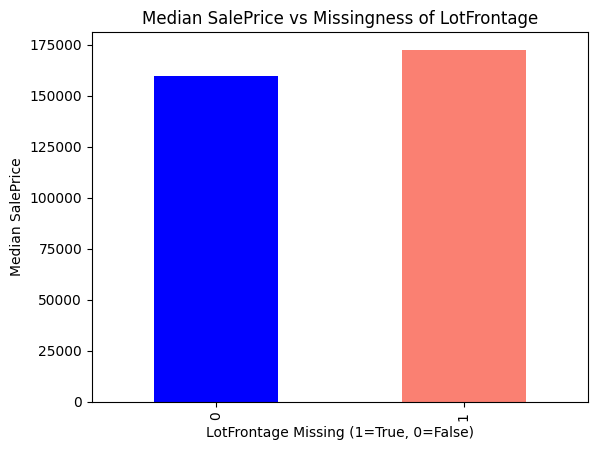

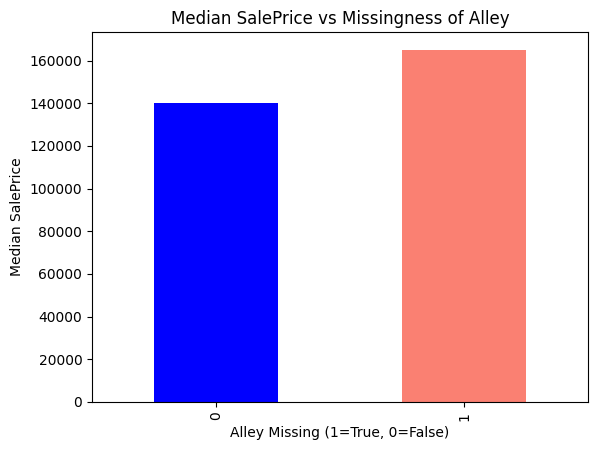

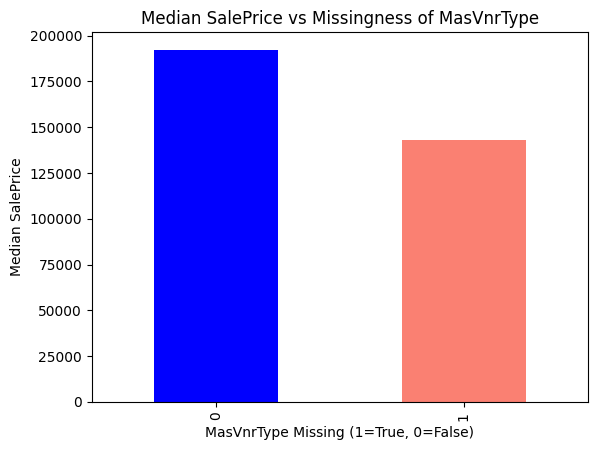

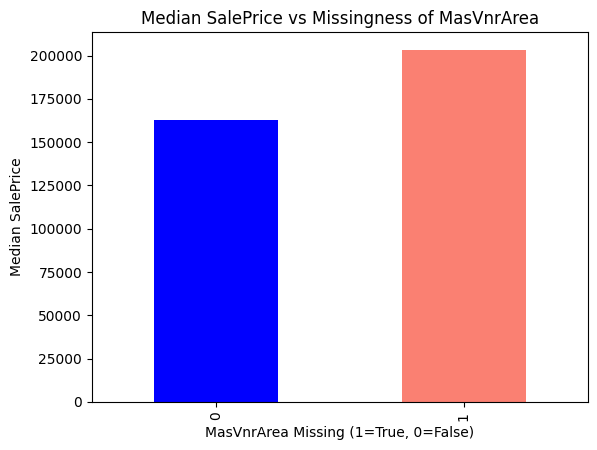

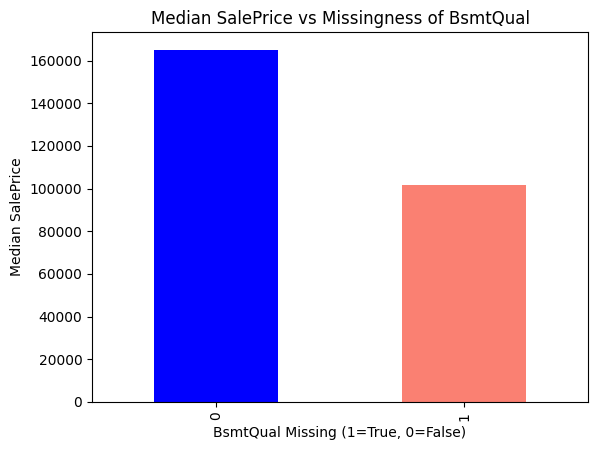

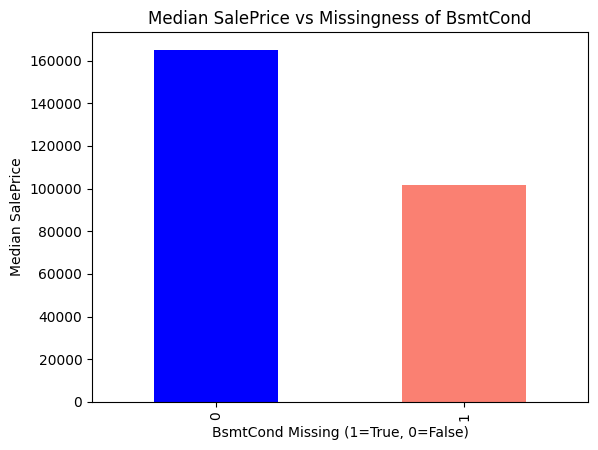

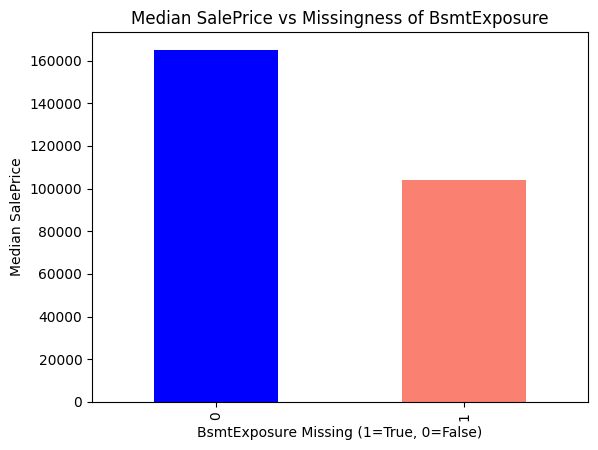

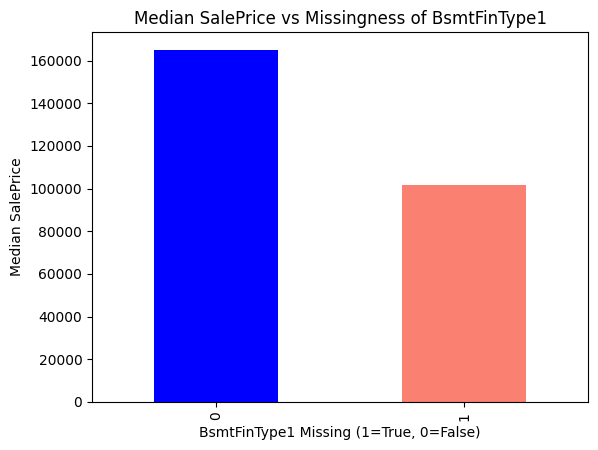

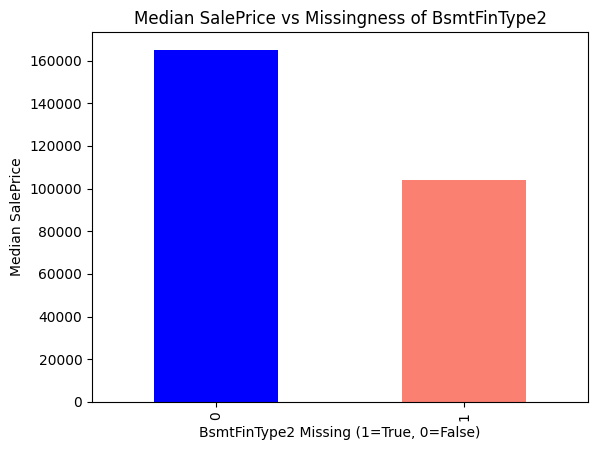

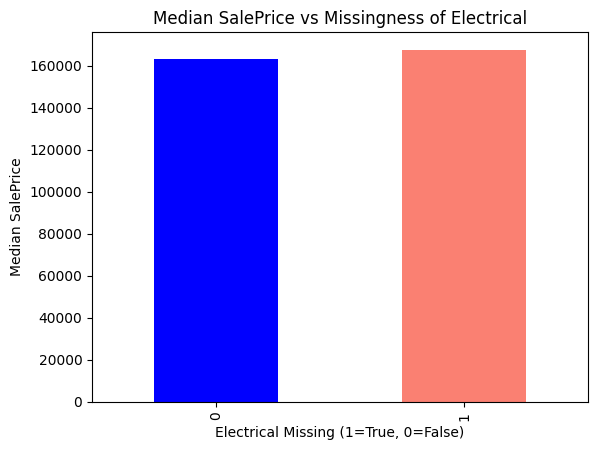

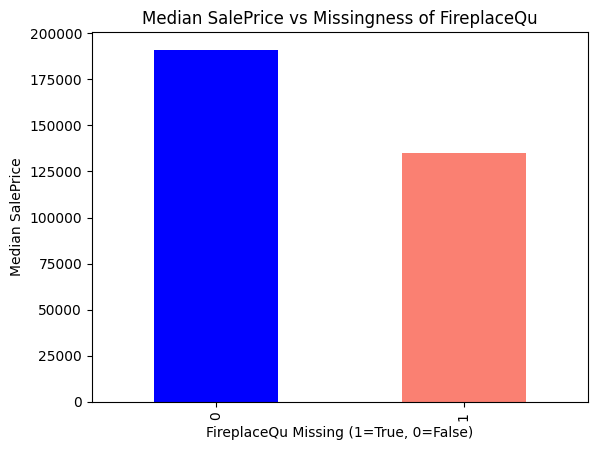

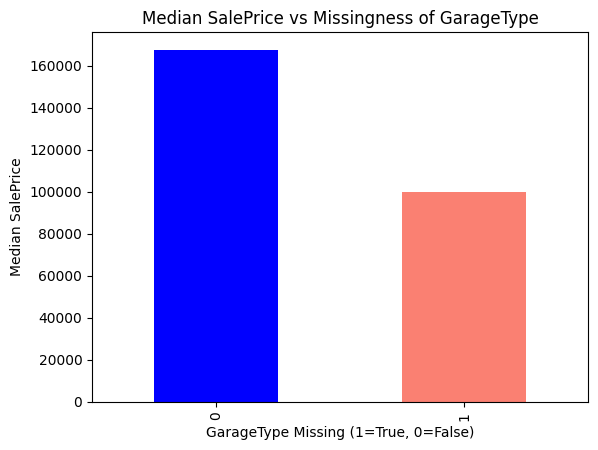

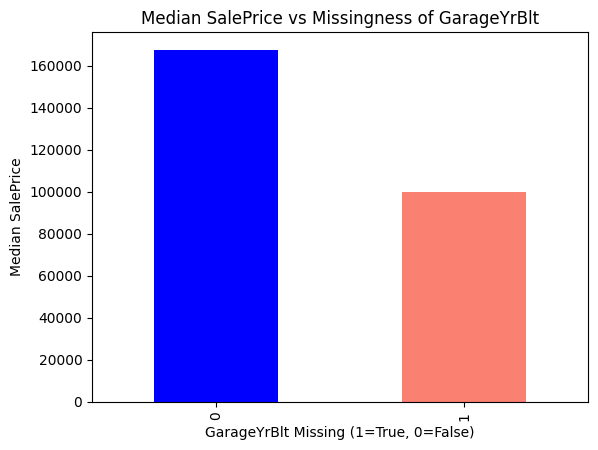

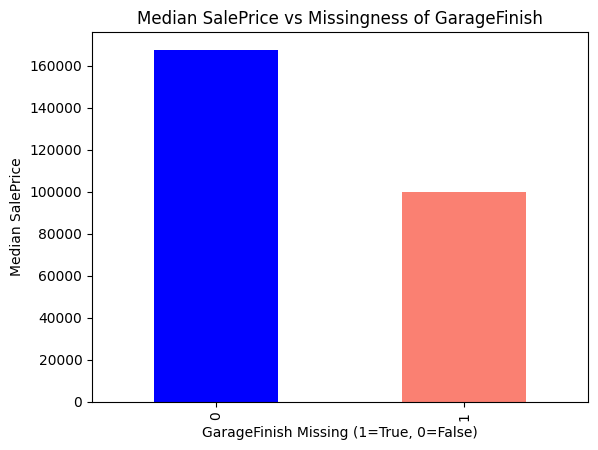

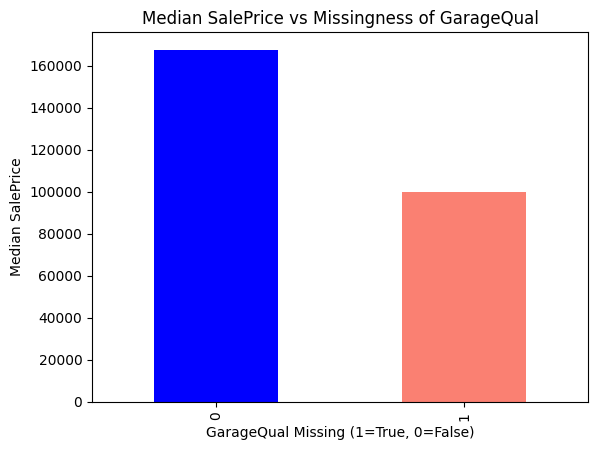

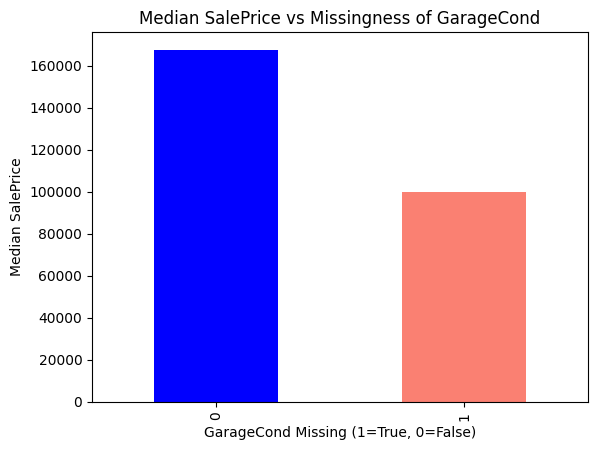

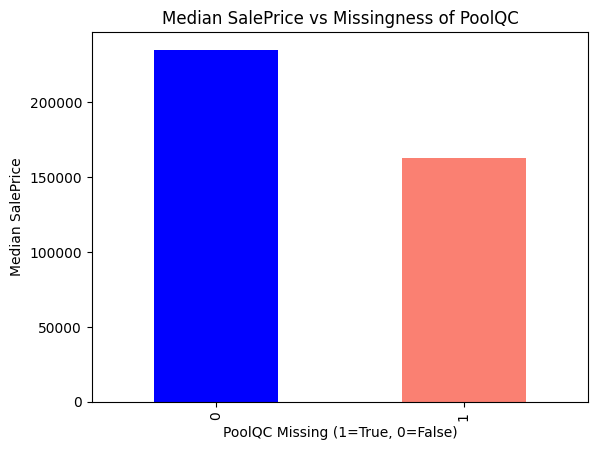

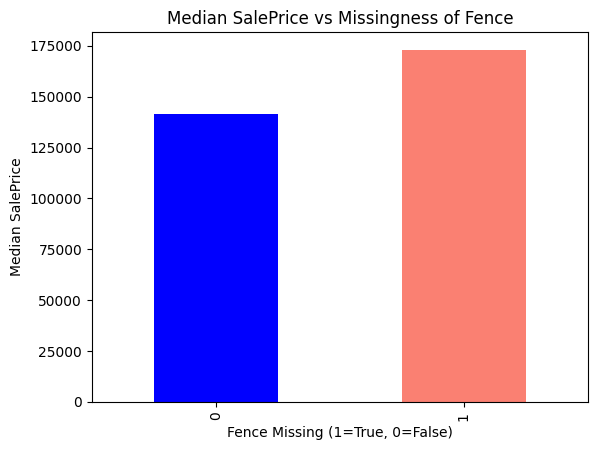

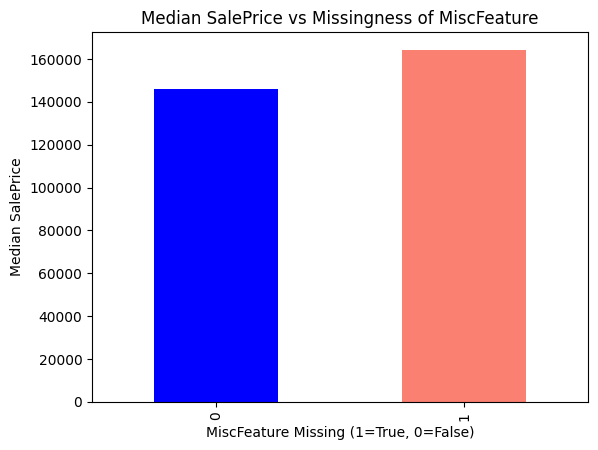

In [7]:
# Loop through each feature that has missing values
for feature in features_with_na:
    # Make a copy to avoid modifying the original dataset
    data = dataset.copy()

    # Create a new binary column: 1 if value is missing, 0 otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Group the data by missing indicator and calculate median SalePrice
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['blue', 'salmon'])

    # Plot formatting
    plt.title(f'Median SalePrice vs Missingness of {feature}')
    plt.xlabel(f'{feature} Missing (1=True, 0=False)')
    plt.ylabel('Median SalePrice')
    plt.show()



Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [8]:
print("Id of Houses {}".format(len(dataset.Id)))

Id of Houses 1460


--------------------------------------------------------------------------

### **Numerical Variables**

In [9]:

# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


**Numerical Features Overview**

We have identified 38 numerical variables in the dataset. These include:

- **Continuous features**: like `GrLivArea`, `LotArea`, `SalePrice`
- **Discrete features**: like `FullBath`, `GarageCars`, `BedroomAbvGr`
- **Temporal features**: like `YearBuilt`, `YearRemodAdd`, `YrSold`

These numerical variables will be the focus of our univariate, bivariate, and correlation analysis.


some insights :
- `YearBuilt`: Year the house was built
- `YearRemodAdd`: Year of last remodeling
- `GarageYrBlt`: Year the garage was built
- `YrSold`: Year the house was sold

These variables on their own aren't very meaningful. To gain deeper insights, we calculate differences such as:

- **House Age** = YrSold - YearBuilt
- **Time Since Remodel** = YrSold - YearRemodAdd
- **Garage Age** = YrSold - GarageYrBlt

This helps us analyze whether **newer houses, newer garages, or recent renovations** impact house prices.

In [10]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

**Output Analysis & Insights**
1. YearBuilt
- This includes very old houses (even from the 1800s)
- More deterioration, More renovations, Different pricing behavior
- This wide range justifies using House Age as a feature rather than raw years.
- should check if older houses are valued less (or more due to heritage) using plots like HouseAge vs SalePrice.

2. YearRemodAdd
- Many values match YearBuilt, meaning the house was never remodeled.
- This column helps detect modernization, which may impact pricing.

3. GarageYrBlt
- Missing values exist, likely for homes without a garage.
- Many garages built years after the house — useful for feature engineering.
- Fill missing GarageYrBlt with YearBuilt only if the home is known to have a garage.

4. YrSold
- Only 5 years of data, so time-series patterns may be limited.
- But we can still analyze year-over-year price trends.
- Plot YrSold vs Average SalePrice to see if there's any trend due to: Market appreciation, Recession effects (2008)



-------------------------------------------------------------------------------

Text(0.5, 1.0, 'House Price vs YearSold')

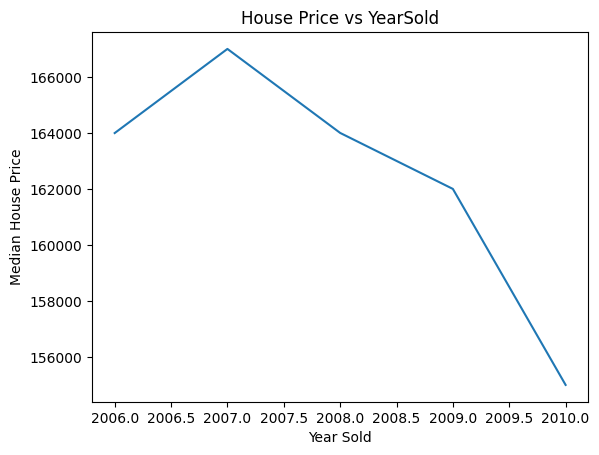

In [12]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**House Price Trends Over Time**

We analyzed how the year of sale (`YrSold`) affects median house prices.

The trend shows a **decline in prices** from 2006 to 2010, likely reflecting the real-world housing market crash of 2008.

| Year | Median SalePrice |
|------|------------------|
| 2006 | High             |
| 2007 | ↓                |
| 2008 | ↓↓               |
| 2009 | ↓↓↓              |
| 2010 | Lowest           |

This variable captures macroeconomic influence and may be important in modeling price trends over time.


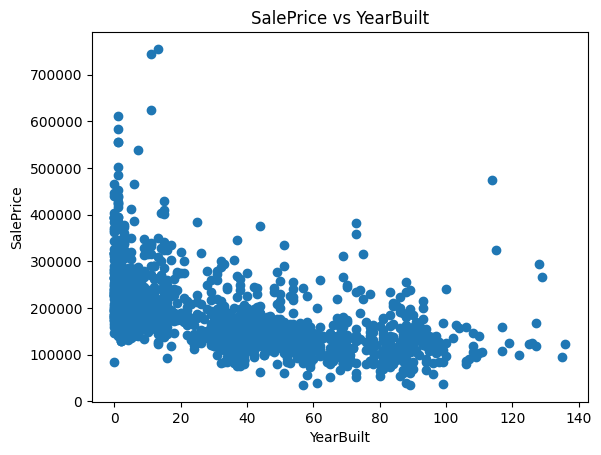

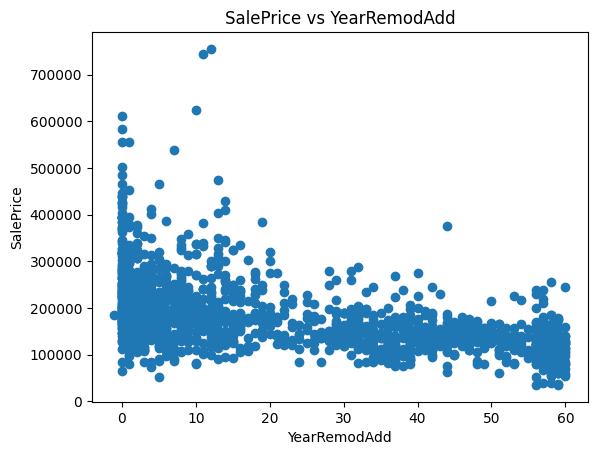

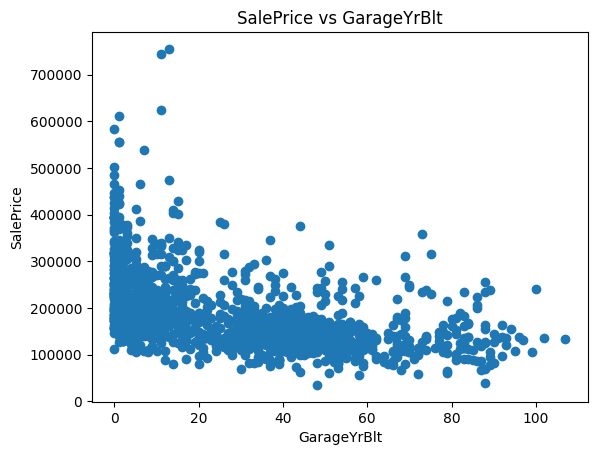

In [14]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.title(f'SalePrice vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Age Features vs SalePrice

We analyzed the effect of "age" of different features on house prices by calculating:

- `HouseAge = YrSold - YearBuilt`
- `RemodAge = YrSold - YearRemodAdd`
- `GarageAge = YrSold - GarageYrBlt`

#### Key Observations:

| Feature       | Insight                                               |
|---------------|--------------------------------------------------------|
| HouseAge      | Newer homes sell for more. Price drops with age.      |
| RemodAge      | Recent remodels increase price. Modern upgrades matter.|
| GarageAge     | Newer garages slightly improve value.                 |

These features capture **temporal dynamics** of the house and contribute significantly to pricing behavior.


------------------------------------------------------------------------------

In [15]:
## Numerical variables are usually of 2 type
## Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [16]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

**Discrete Numerical Variables**

Discrete variables are numerical features that represent countable quantities or categories. Typically, these have a **low number of unique values** and are often interpreted **categorically** even though they are numeric.

We identified 17 such features in the dataset:

- **Building Attributes**: MSSubClass, OverallQual, OverallCond, TotRmsAbvGrd
- **Room & Bath Counts**: FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, BsmtFullBath, BsmtHalfBath
- **Amenities & Size Elements**: Fireplaces, GarageCars, LowQualFinSF, 3SsnPorch, PoolArea, MiscVal
- **Temporal Element**: MoSold (month sold)

These features are useful for understanding structural and functional aspects of the house that affect its market value.


In [17]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


**Preview of Discrete Numerical Features**

Here is a quick look at the first few entries of the discrete variables. These features are typically countable or categorical in nature (even though they are numeric).

We observe:
- Many rare features like `3SsnPorch`, `PoolArea`, and `MiscVal` are 0 for most entries.
- Features such as `OverallQual`, `GarageCars`, and `TotRmsAbvGrd` vary and may be influential in predicting house price.
- `MoSold` can provide insights into **seasonal sales trends**.

These variables will be further analyzed to see their correlation with the target variable, `SalePrice`.


----------------------------------------------------------------------------

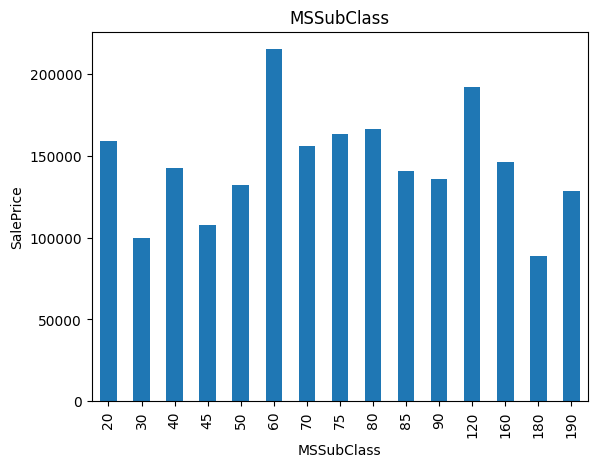

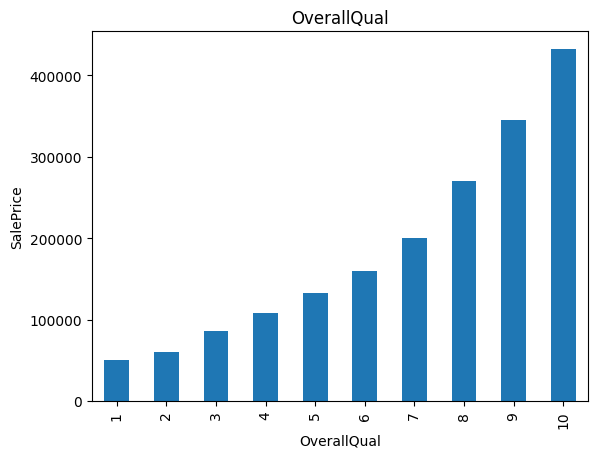

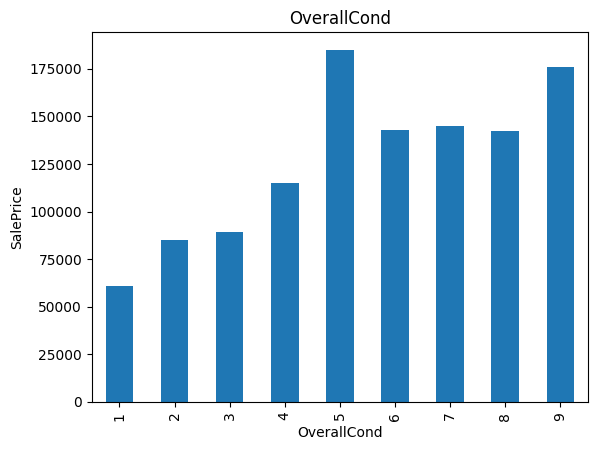

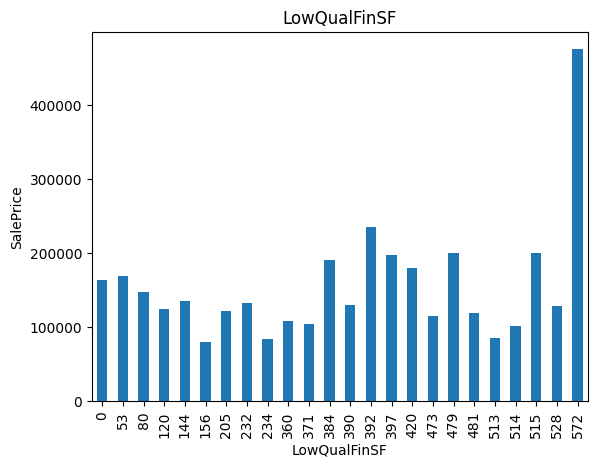

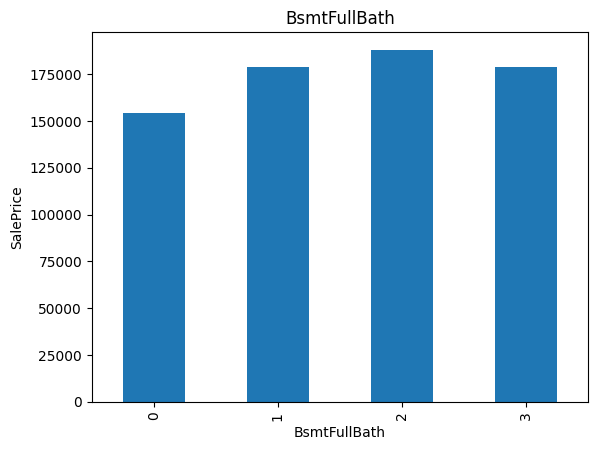

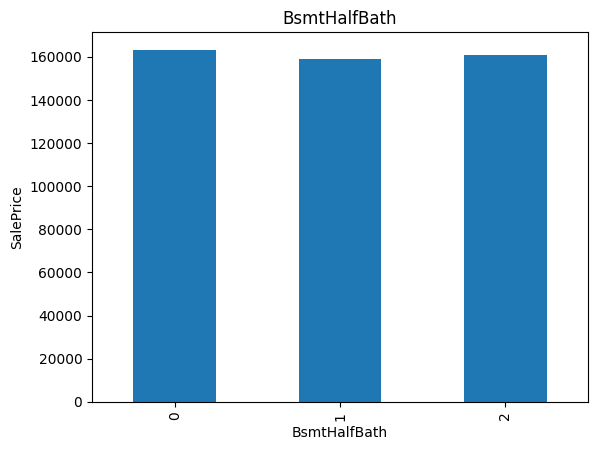

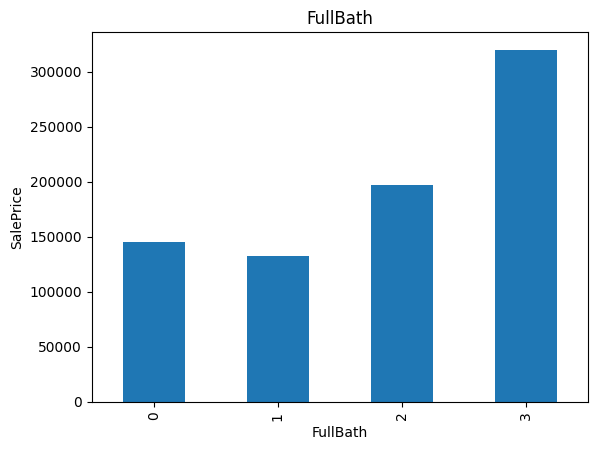

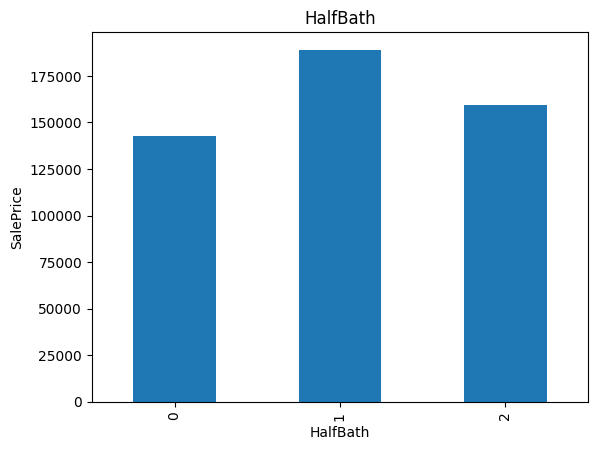

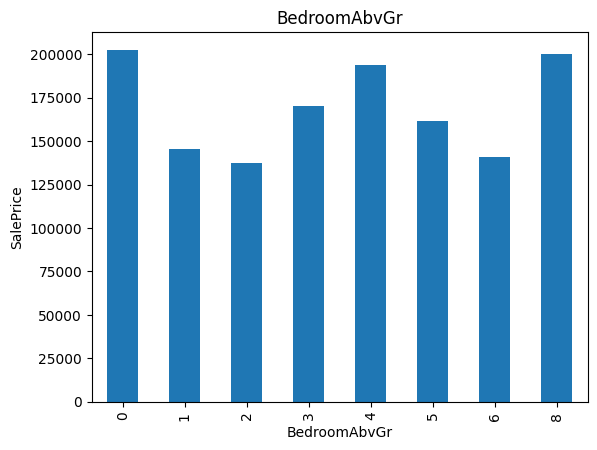

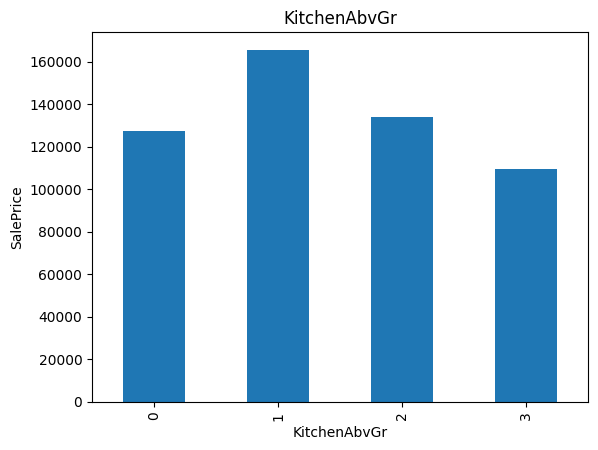

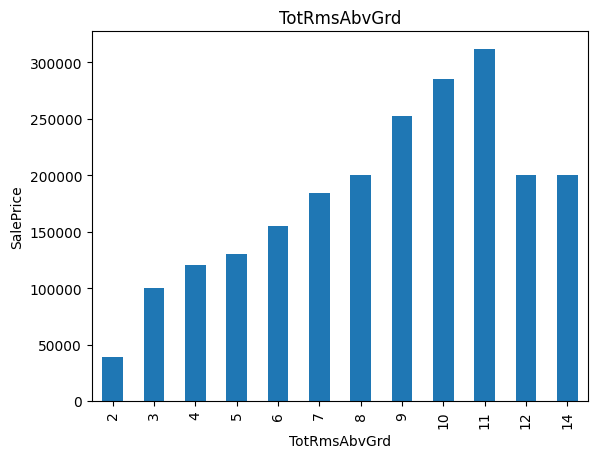

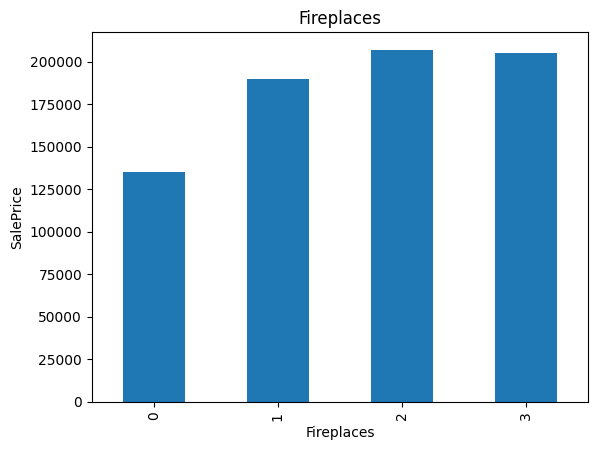

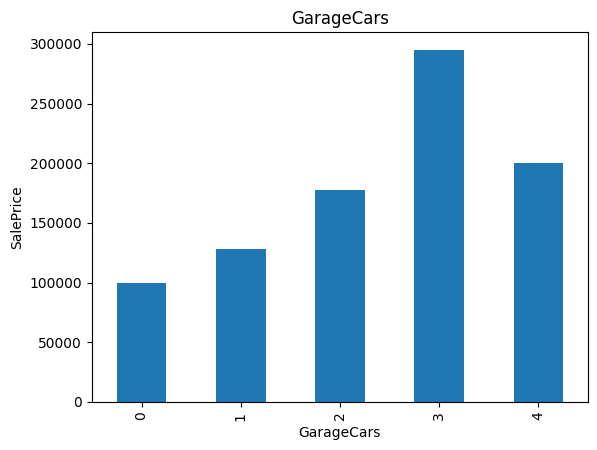

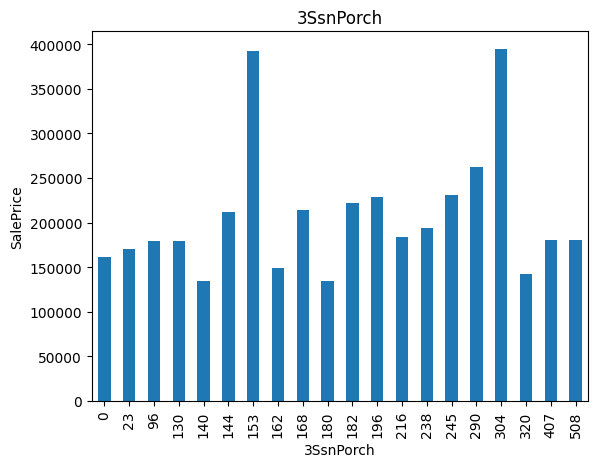

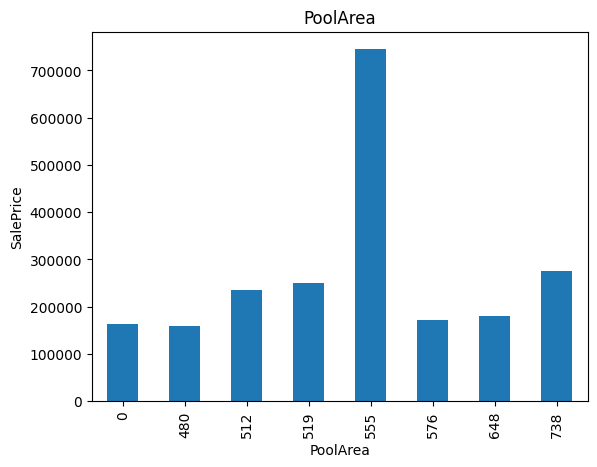

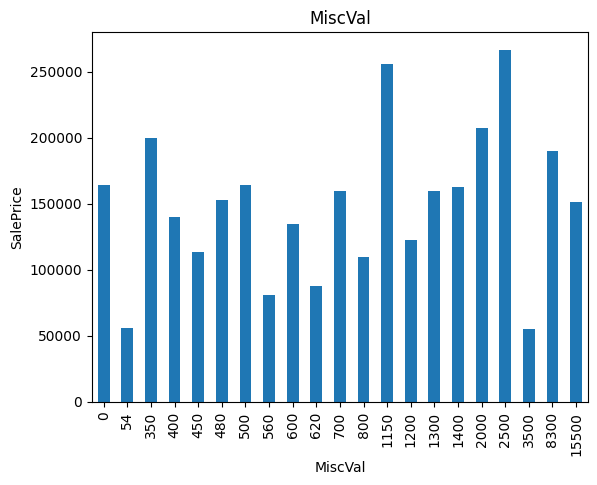

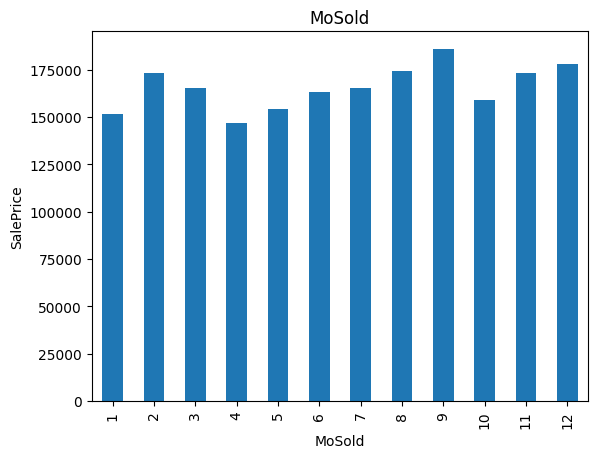

In [18]:
# Lets Find the realtionship between them and Sale Price
# To understand how each continuous numerical feature is distributed, 
# we plotted **histograms**

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**Discrete Numerical Features vs SalePrice (Bar Plot Summary)**

We analyzed 17 discrete numerical features (those with fewer than 25 unique values) by plotting their median `SalePrice`. Here's a summary based on patterns observed:

**Features showing strong positive correlation with `SalePrice`:** 
- `OverallQual`, `GarageCars`, `FullBath`, `Fireplaces`
- These features clearly show increasing `SalePrice` with higher values.
- They are excellent candidates for modeling, including possible interaction terms.

**Features with weak or unclear correlation**:
- `OverallCond`, `BedroomAbvGr`, `TotRmsAbvGrd`, `HalfBath`, `KitchenAbvGr`
- These features do not show a consistent trend with `SalePrice`.
- May have low predictive power unless combined with other variables.

**Features that appear sparse or skewed**:
- `LowQualFinSF`, `3SsnPorch`, `PoolArea`, `MiscVal`
- Most values are 0 with a few extreme outliers.
- Consider binning to binary flags or dropping if found uninformative during modeling.

**Features that are categorical in nature (though numeric in format):**
- `MSSubClass`, `MoSold`
- 💡 These features are actually categories (e.g., type of dwelling, month sold).
- 🔁 Convert to categorical data type for better modeling and interpretation.

**Conclusion**
- There is a relationship between variable number and SalePrice
- Not all numeric-looking variables should be treated the same.
- We will keep the strongly correlated ones as they are.
- Others will be transformed, binned, or dropped based on modeling results.


------------------------------------------------------------------------

### **Continuous Variable**

In [19]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


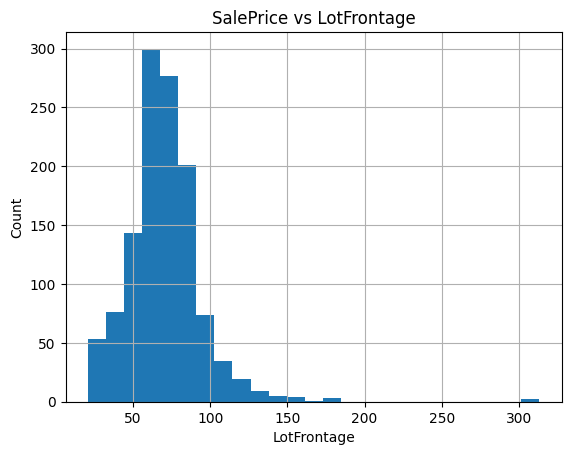

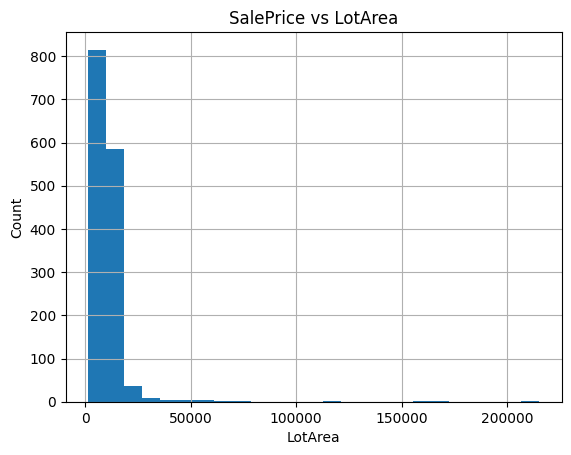

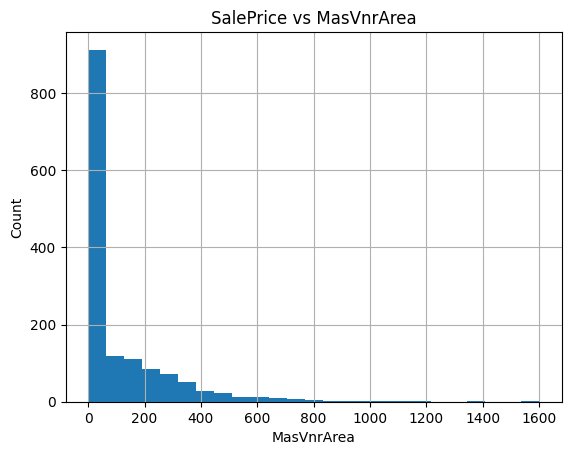

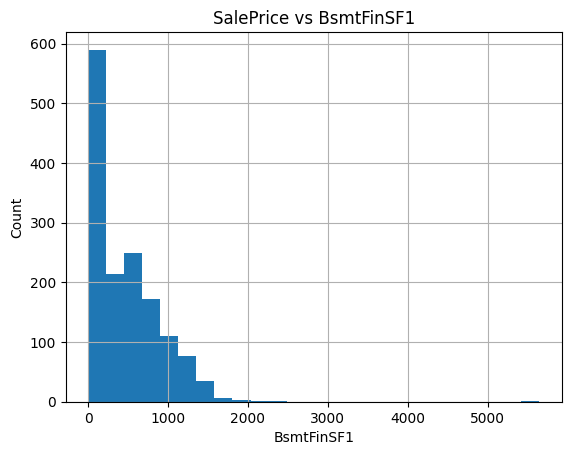

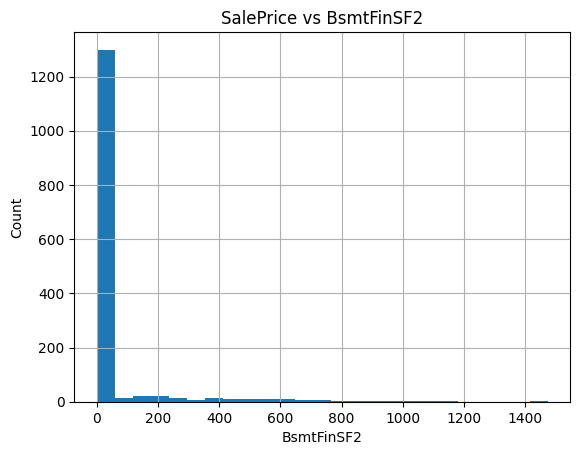

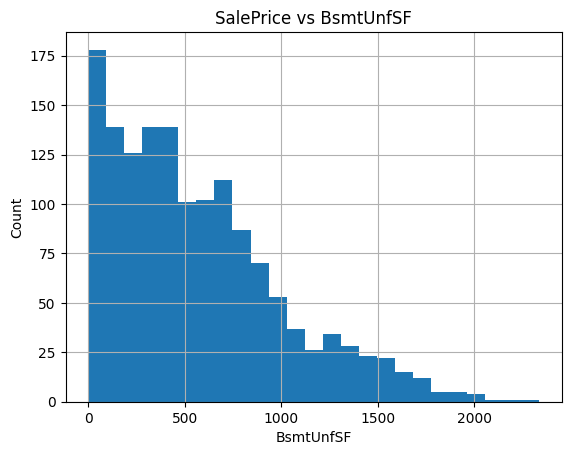

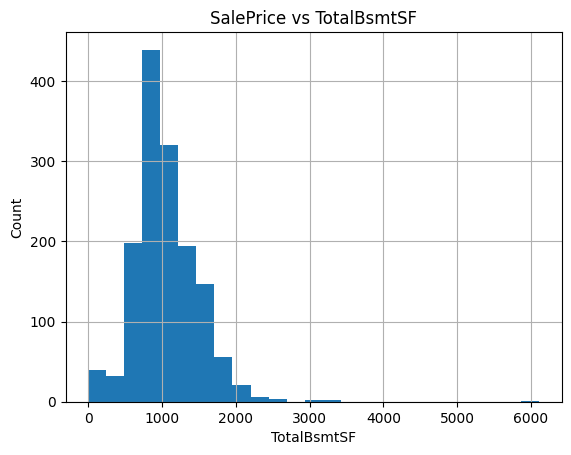

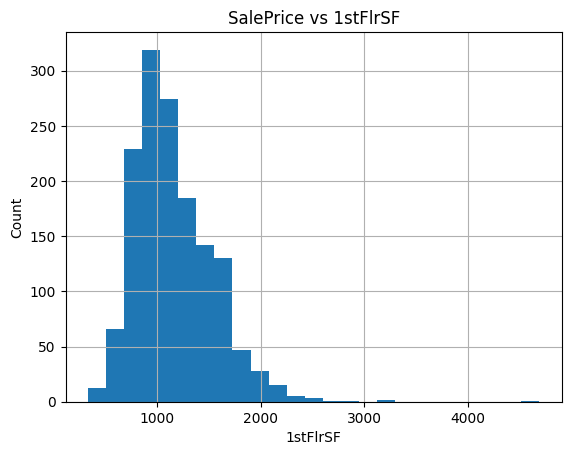

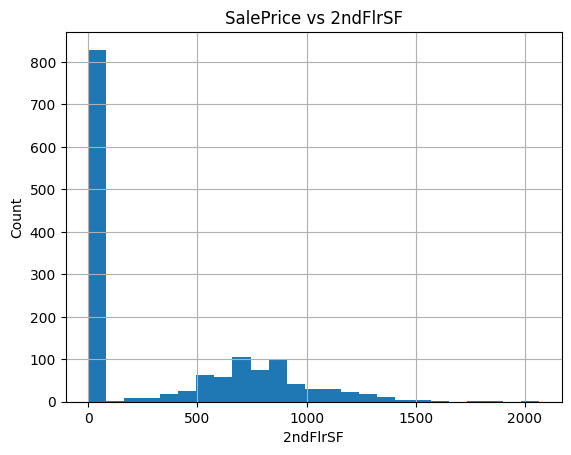

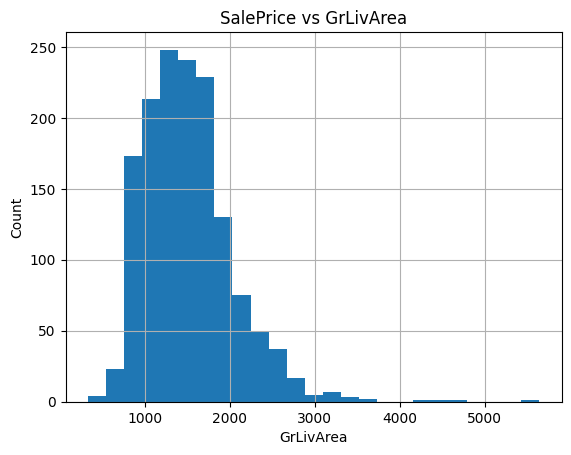

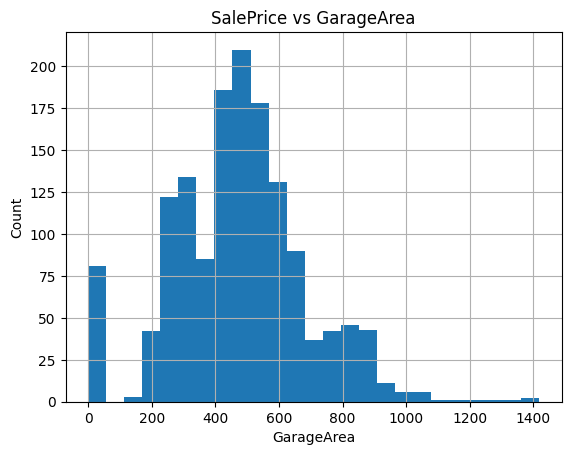

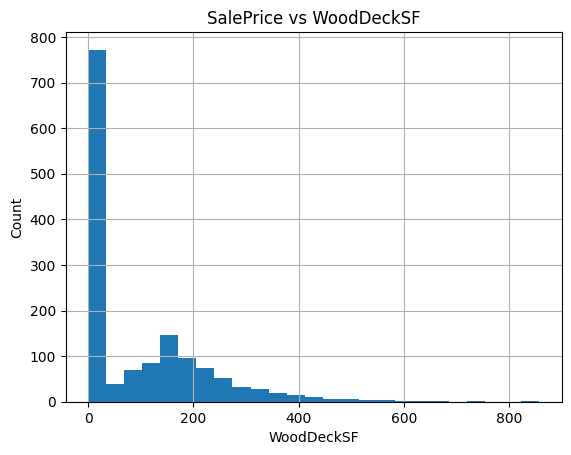

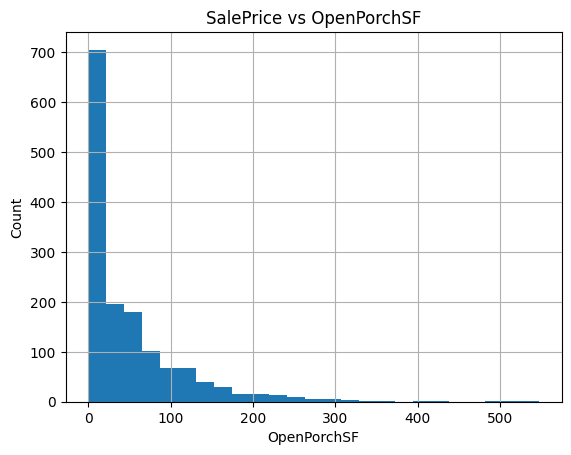

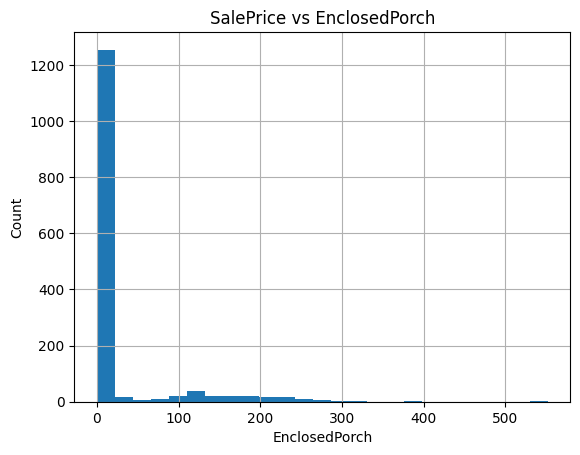

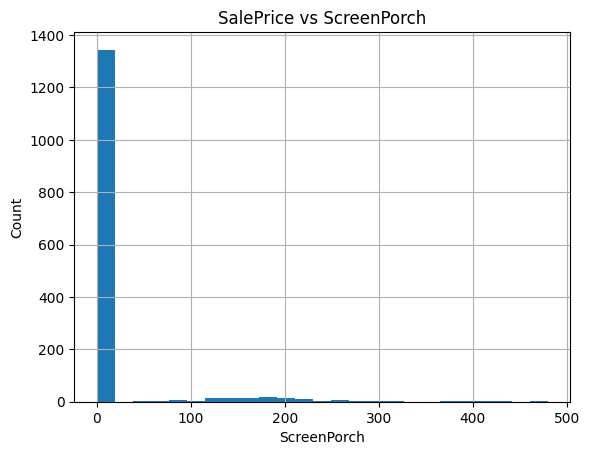

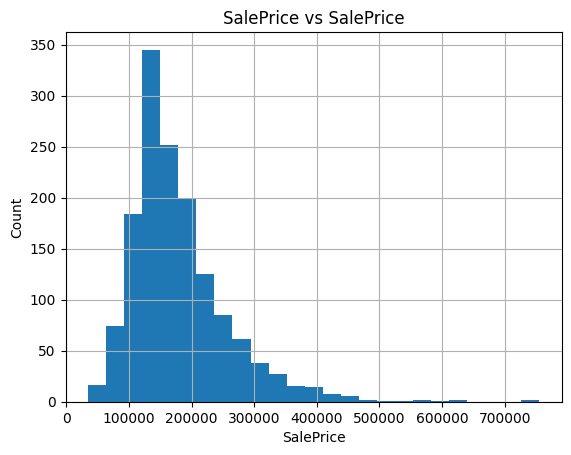

In [20]:
## Lets analyse the continuous values by creating histograms to understand the distribution


for feature in continuous_feature:
    data = dataset.copy()

    data[feature].hist(bins=25)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

**Continuous Variable Analysis**

We analyzed 16 continuous numerical variables by plotting histograms to understand their distribution.

`Key Observations:`
- Most variables (e.g., `LotArea`, `GrLivArea`, `TotalBsmtSF`) are **right-skewed**, with a few extreme values.
- A small number of very tall bars suggest the presence of **outliers** or highly frequent low values.
- The distributions are **not normally distributed**, which may affect models like linear regression.

`It is Important because:`
- Skewed distributions can introduce bias or reduce model performance.
- Understanding distribution helps decide:
  - Whether to apply **log transformation** or **normalization**.
  - Whether **outlier handling** is necessary.

----------------------------------------------------------------------

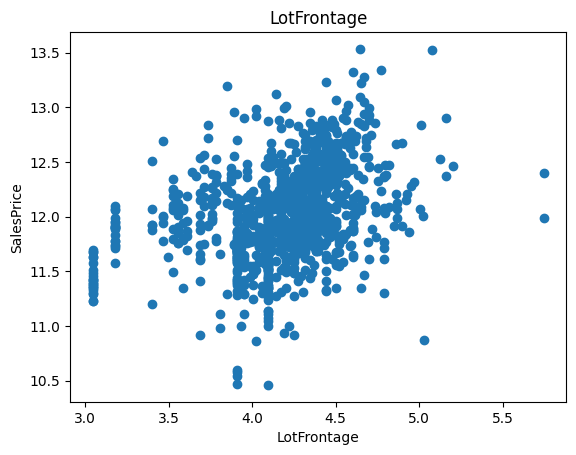

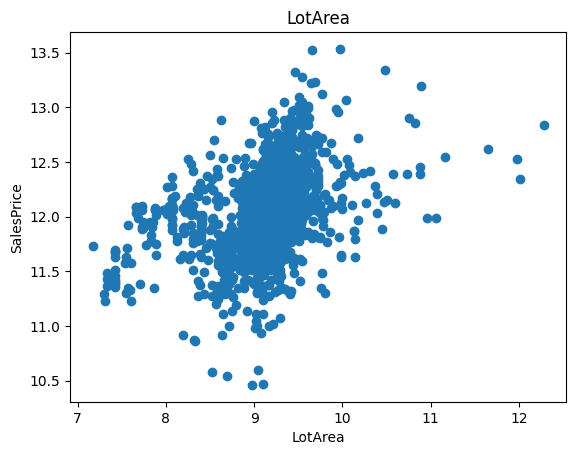

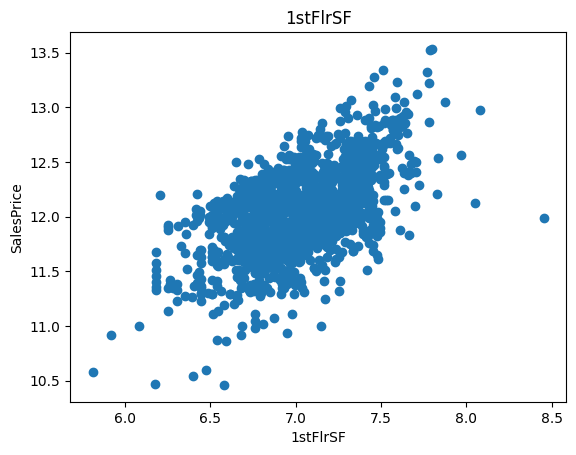

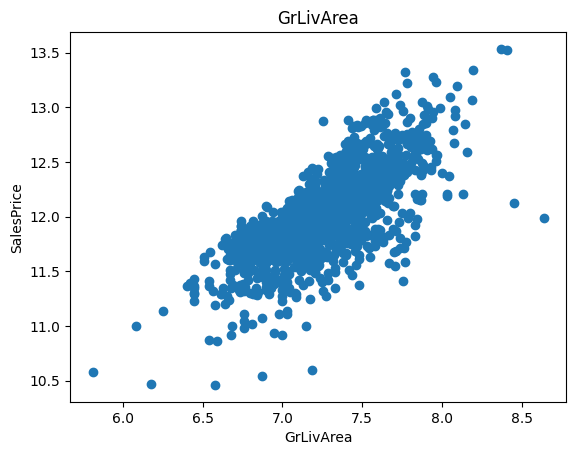

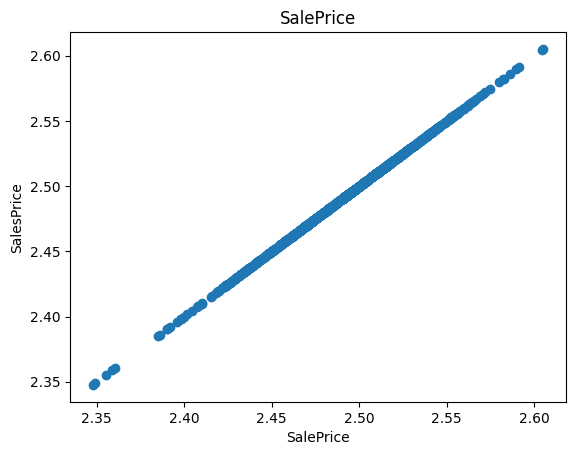

In [21]:
# We will be using logarithmic transformation
# To address the skewness found in many continuous variables, 
# we applied logarithmic transformation to selected features and the target (`SalePrice`).



for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

**Logarithmic Transformation of Continuous Features**

To address the skewness found in many continuous variables, we applied logarithmic transformation to selected features and the target (`SalePrice`).

**Purpose:**
- Reduce **skewness**.
- Handle **outliers** more gracefully.
- Improve **linearity** between features and the target — beneficial for regression models.

- Features containing `0` were skipped since `log(0)` is undefined.

**Observations:**
- After log transformation, several variables like `GrLivArea`, `LotArea`, and `TotalBsmtSF` showed a **more linear relationship** with `SalePrice`.
- This transformation is likely to improve the performance of models like **Linear Regression**, which assume linearity between predictors and the target.



-------------------------------------------------------------------------

### Outliers

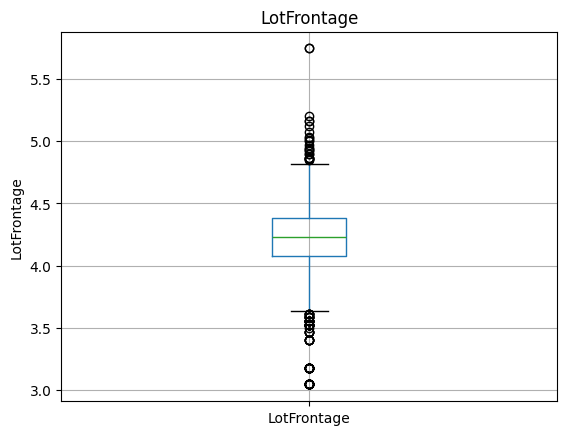

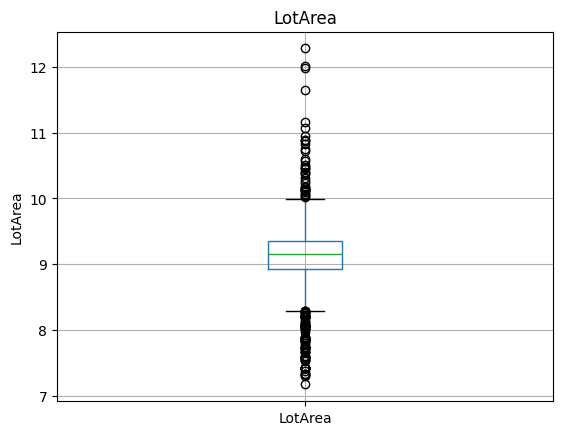

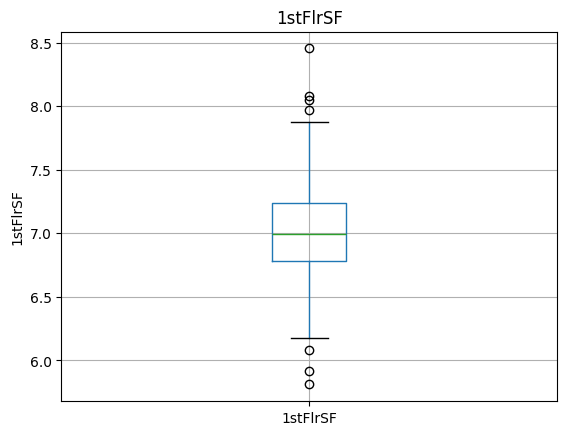

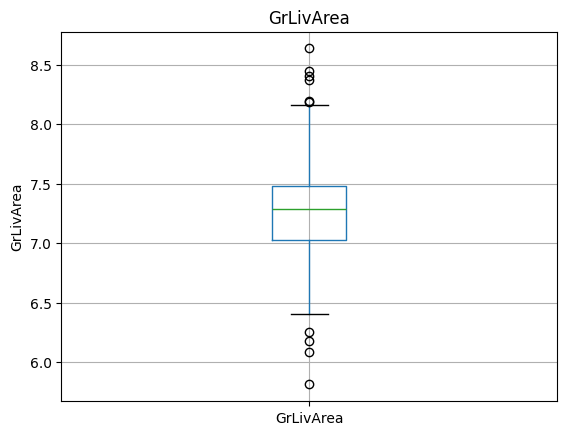

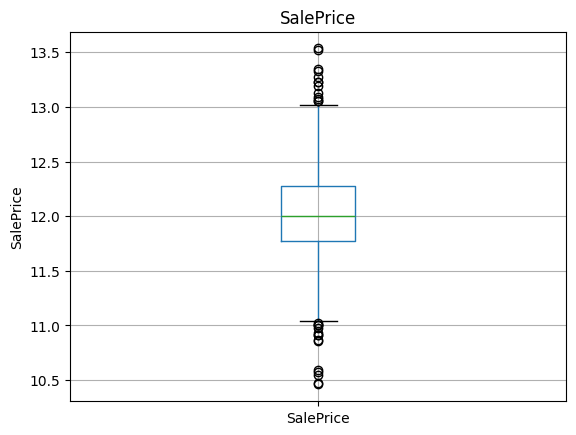

In [22]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Insights from Boxplots:**

`LotFrontage:` Still shows multiple low-end and high-end outliers even after log transformation.

`LotArea: `Exhibits many upper-end outliers, likely large estate lots that differ from the rest of the dataset.

`1stFlrSF, GrLivArea, SalePrice:` While spread is improved after log transform, some outliers are still evident.

-------------------------------------------------------------------

### Categorical Variables

In [24]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

This gives a list of 43 categorical features such as:

- MSZoning, Street, Alley, Neighborhood, RoofStyle, KitchenQual, GarageType, SaleType, etc.

- These are non-numerical attributes that describe qualities or classifications (like zone type, exterior material, or sale condition) and will require encoding before modeling.

In [25]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [26]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

**Output Insights:**

- Most features have between 2 to 7 categories, which are easy to encode (e.g., Street, PavedDrive, CentralAir).

Some features have higher cardinality, such as:
- Neighborhood: 25 categories
- Condition1: 9 categories
- SaleType: 9 categories
- Exterior1st/Exterior2nd: 15–16 categories

High-cardinality features may require:
Target encoding, Grouping rare categories, Careful encoding to avoid dimensionality explosion

- This cardinality check is important to decide the right encoding strategy for ML preprocessing.

----------------------------------------------------------------------

**Find out the relationship between categorical variable and dependent feature SalesPrice**


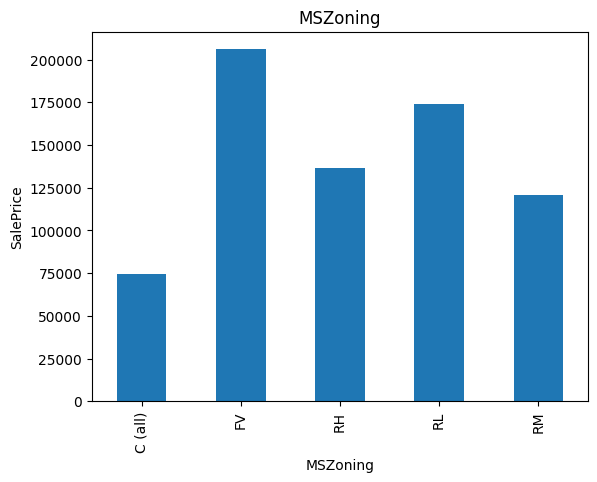

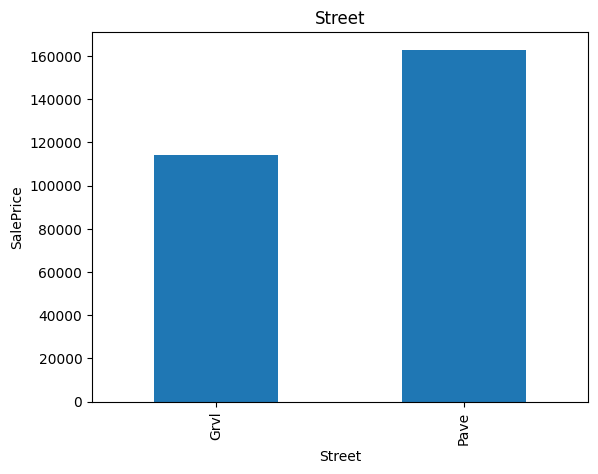

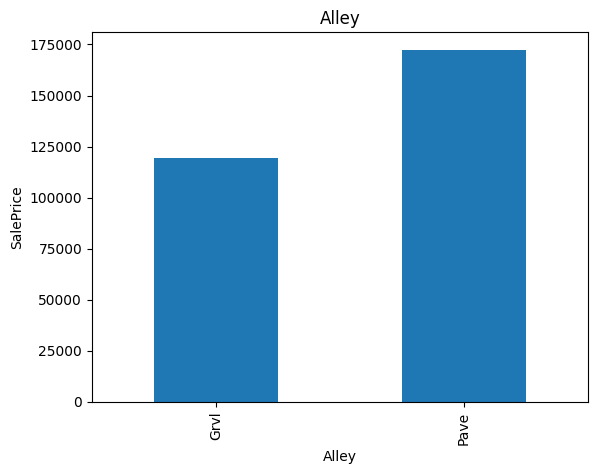

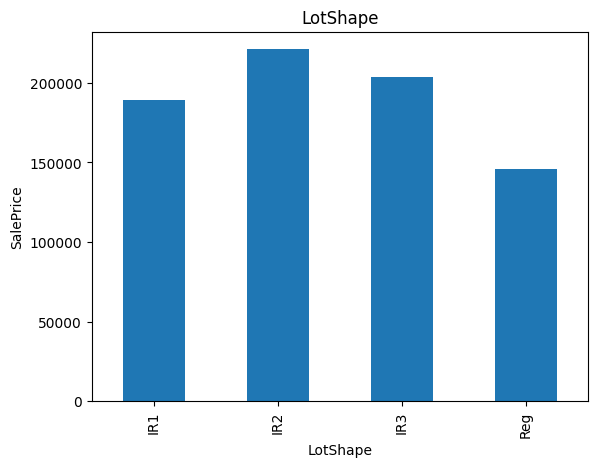

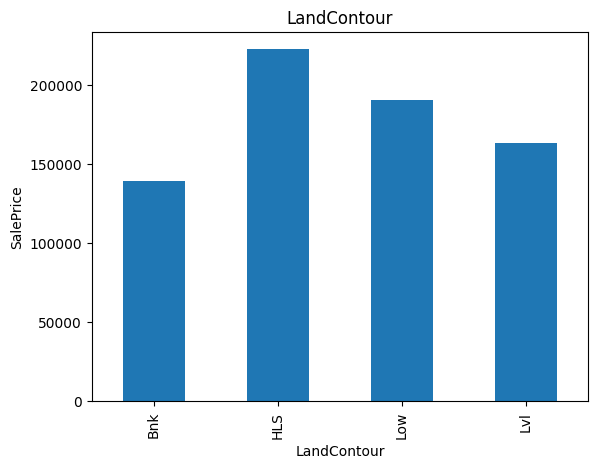

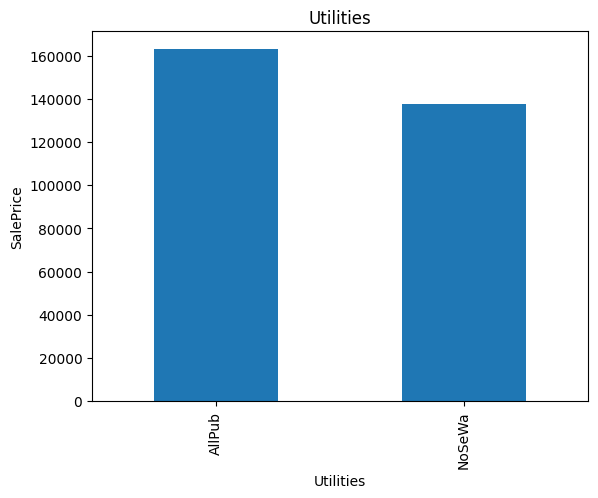

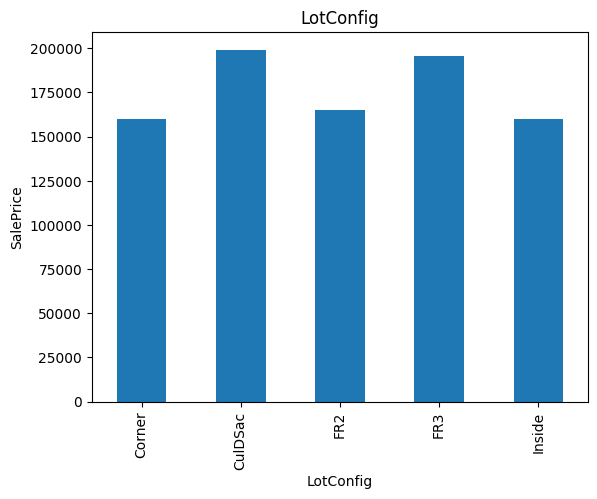

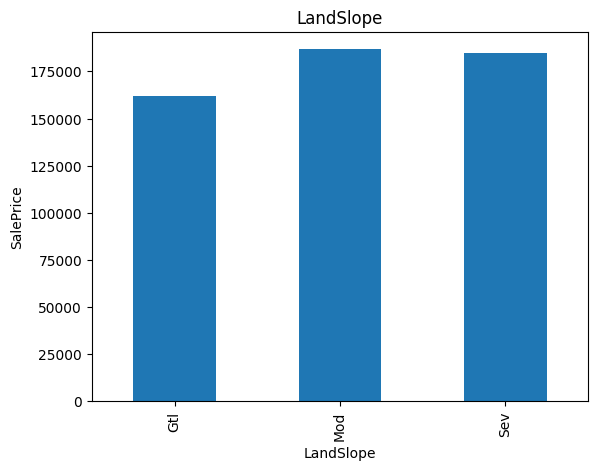

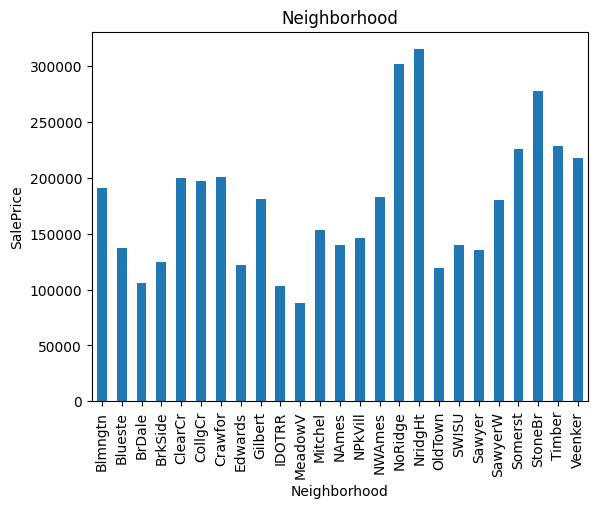

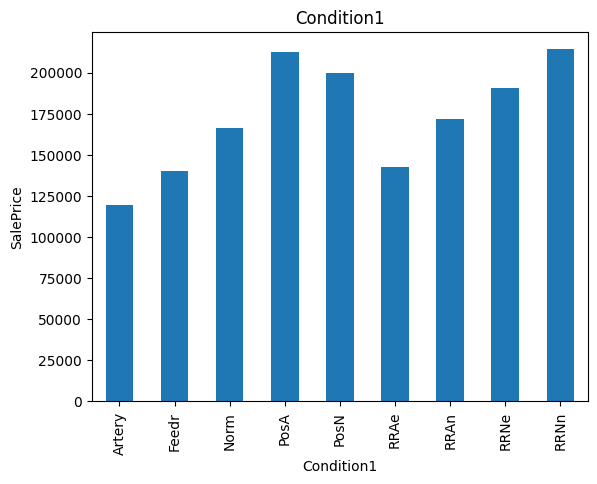

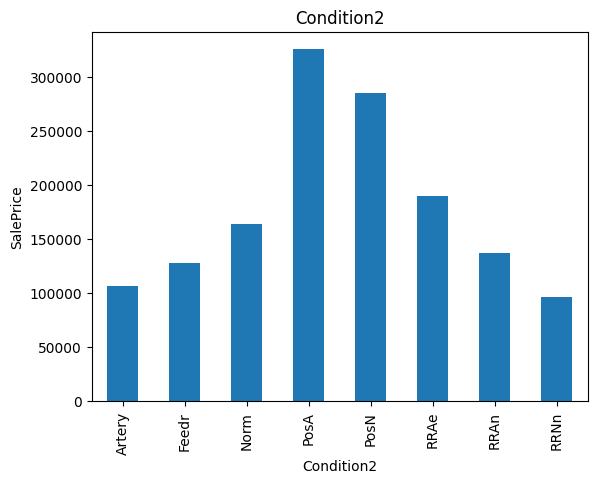

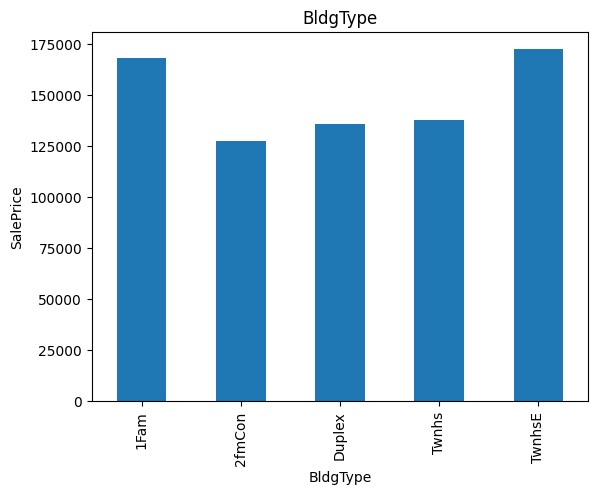

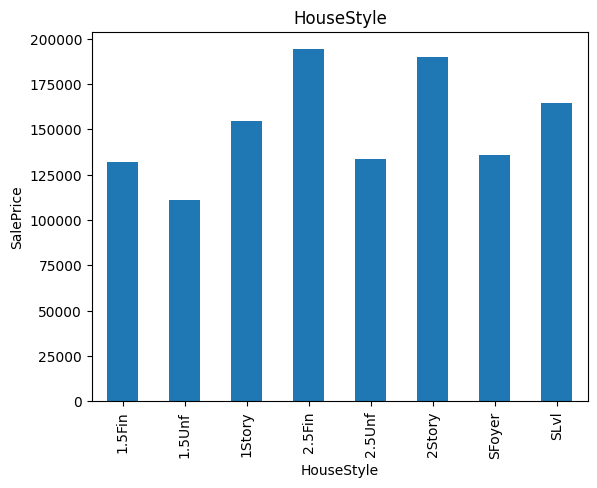

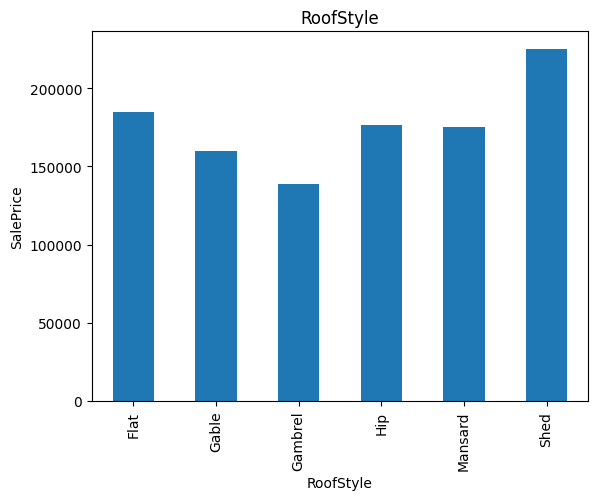

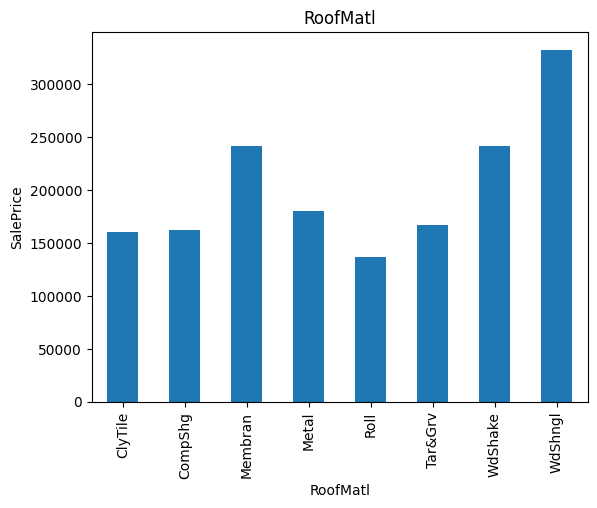

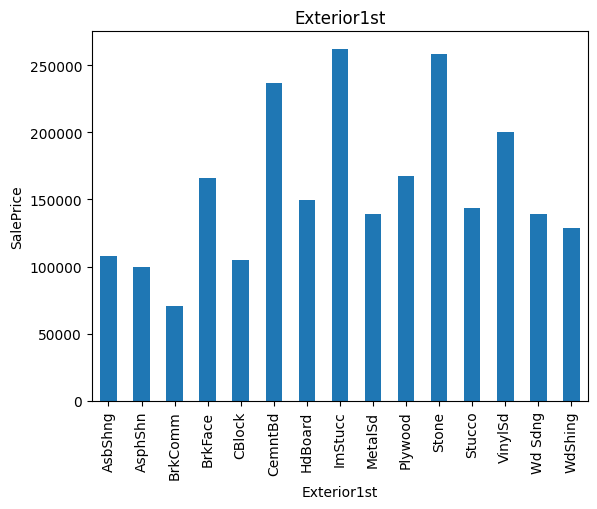

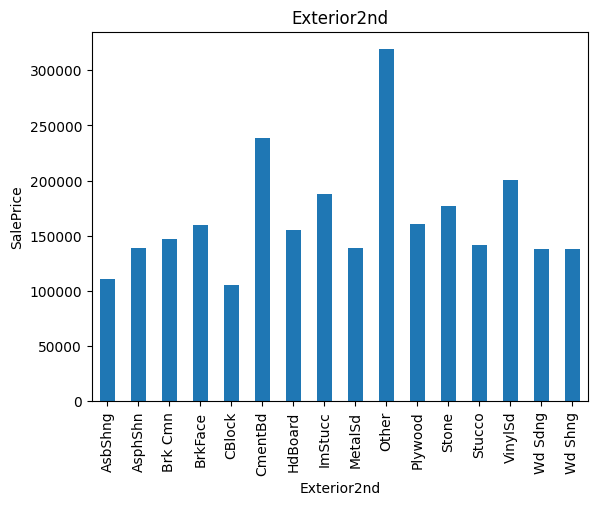

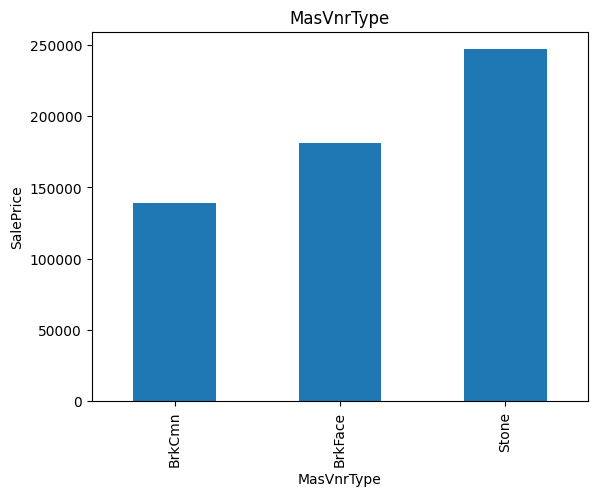

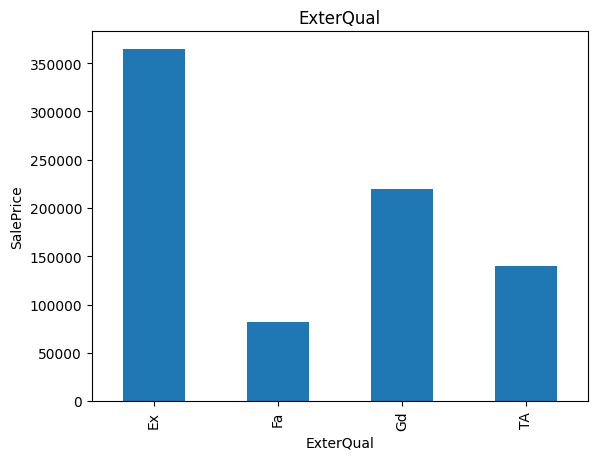

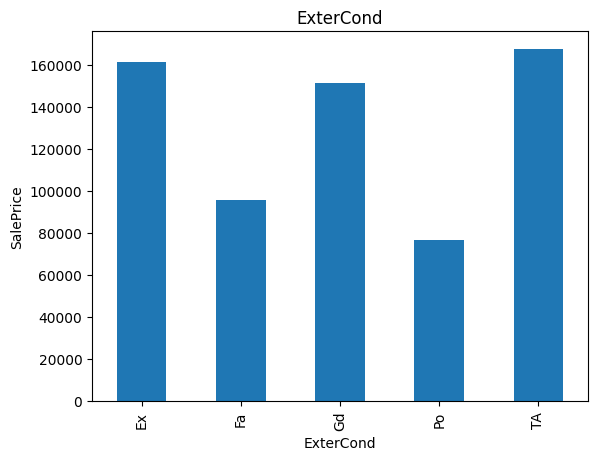

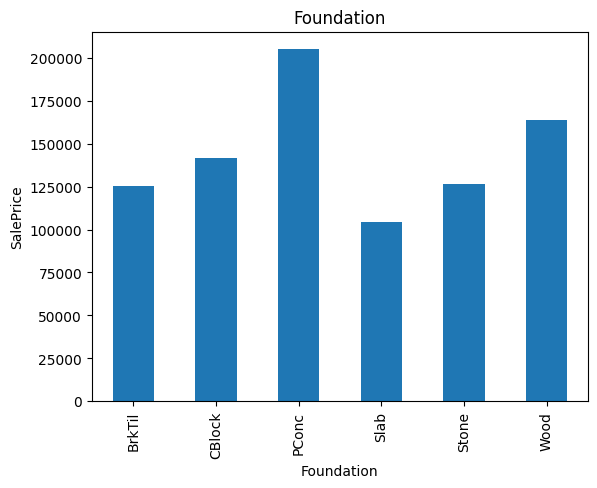

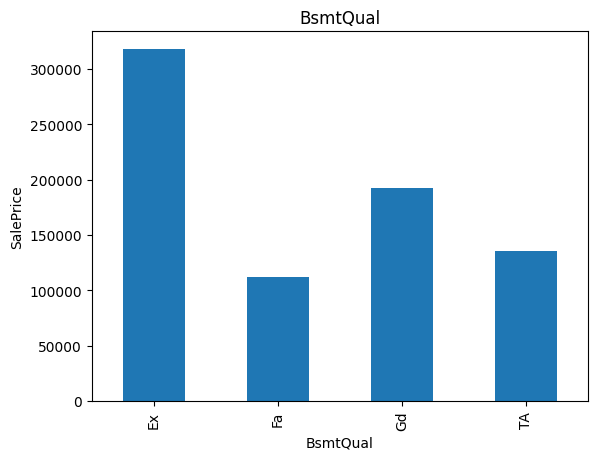

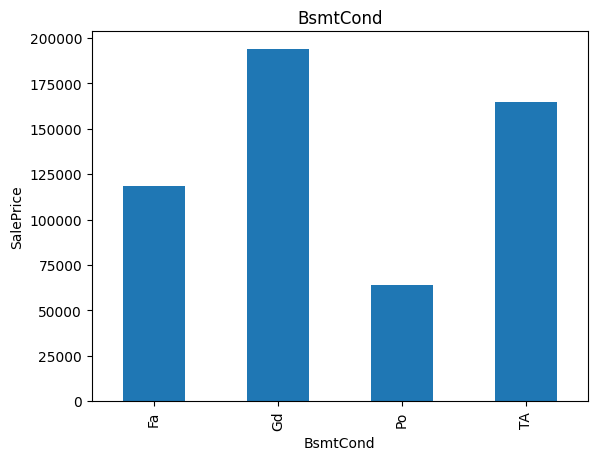

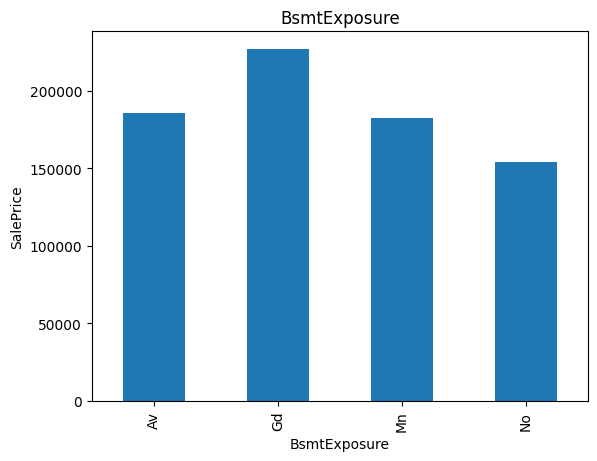

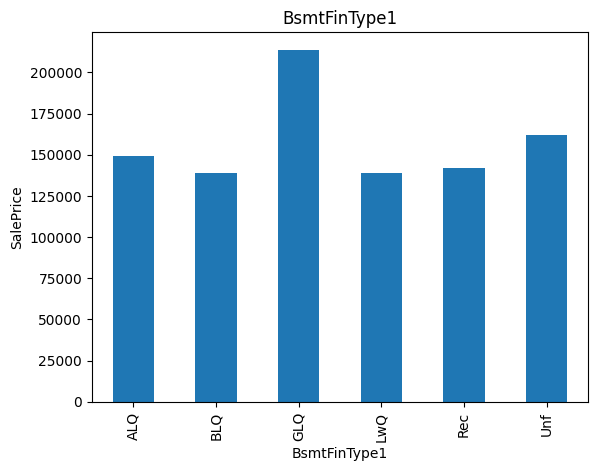

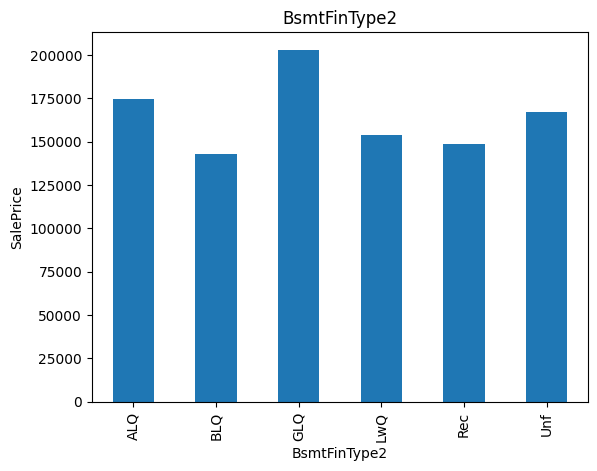

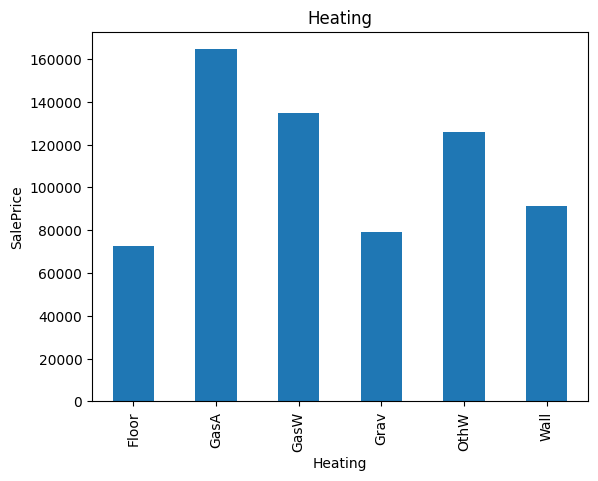

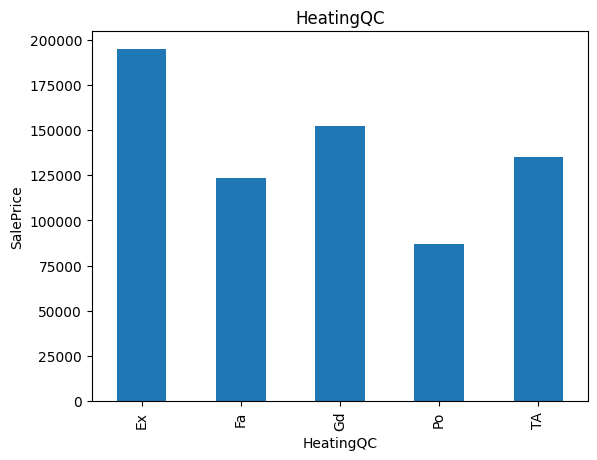

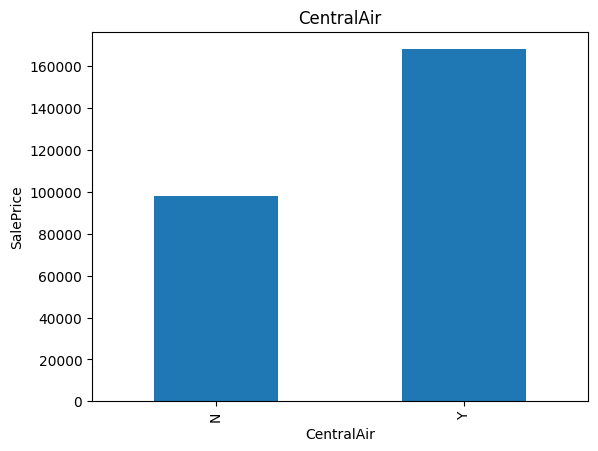

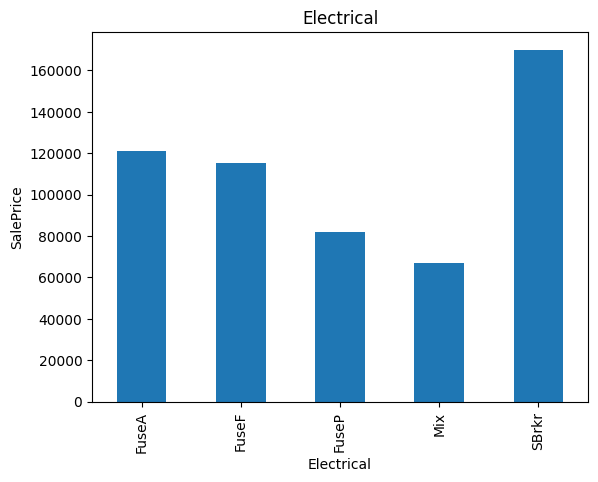

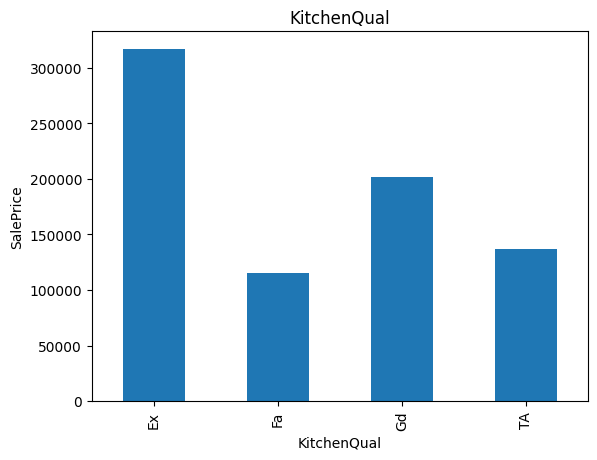

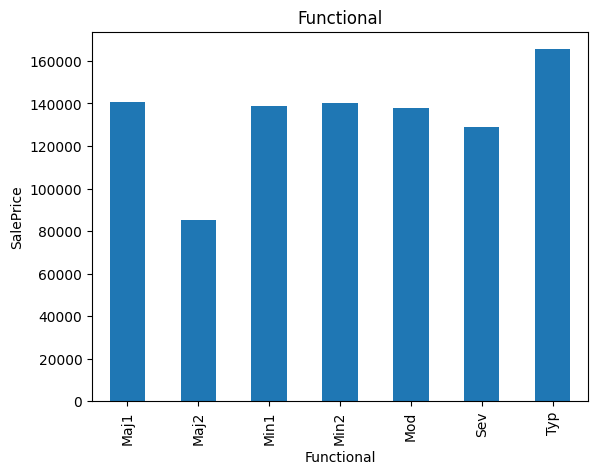

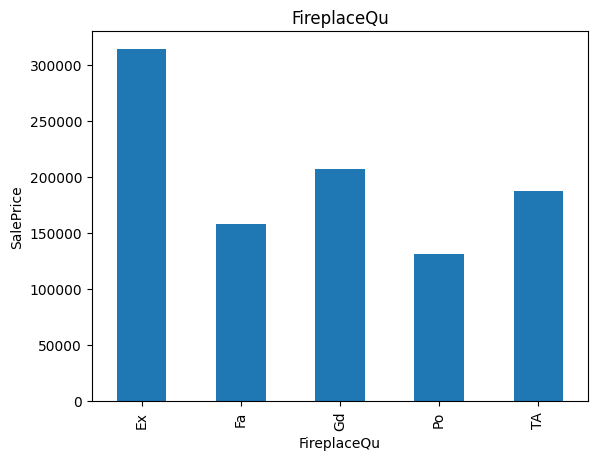

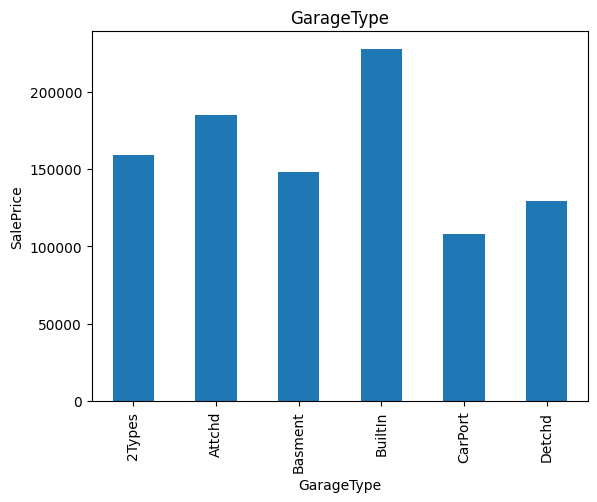

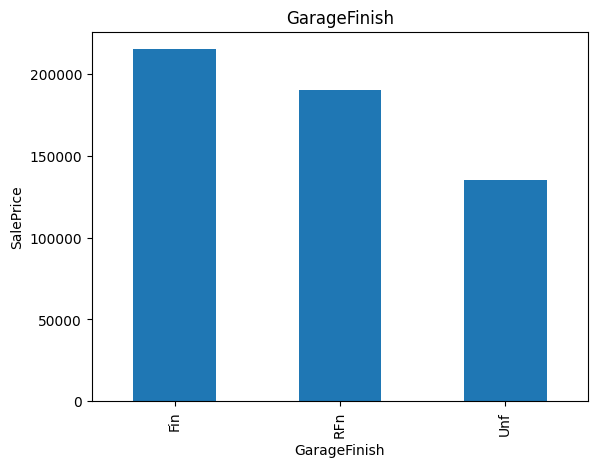

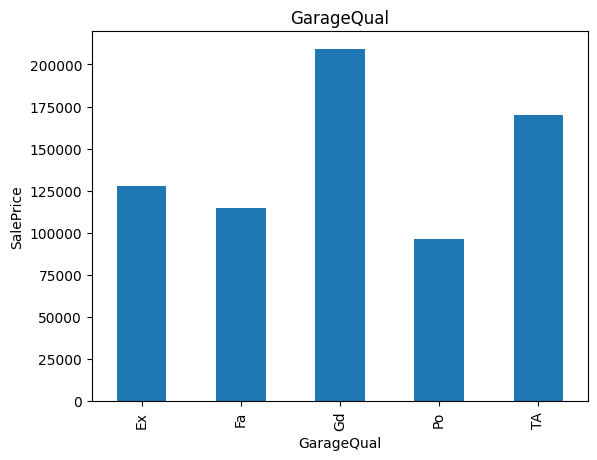

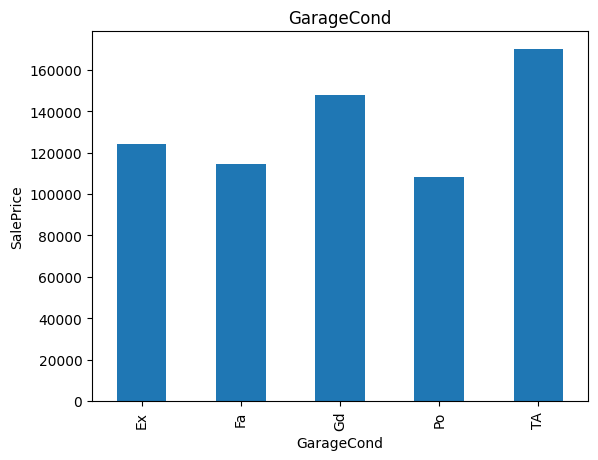

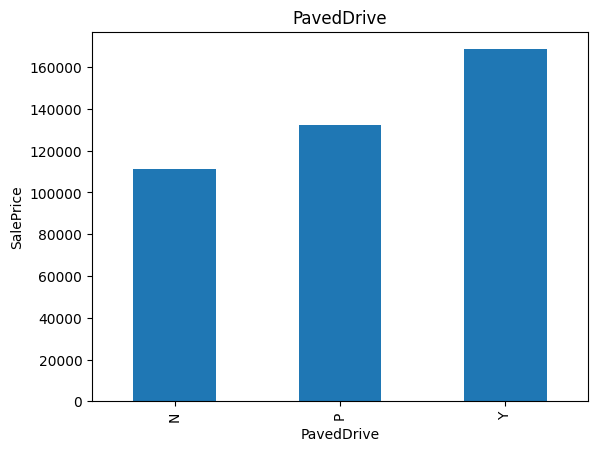

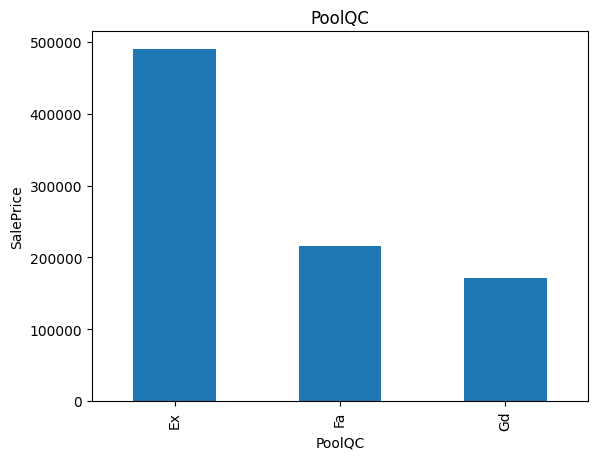

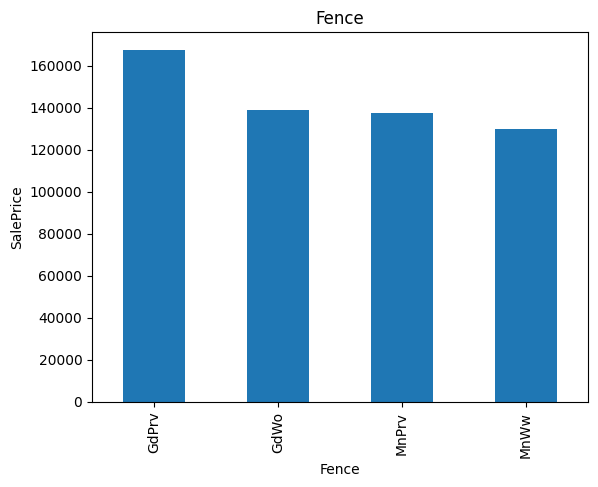

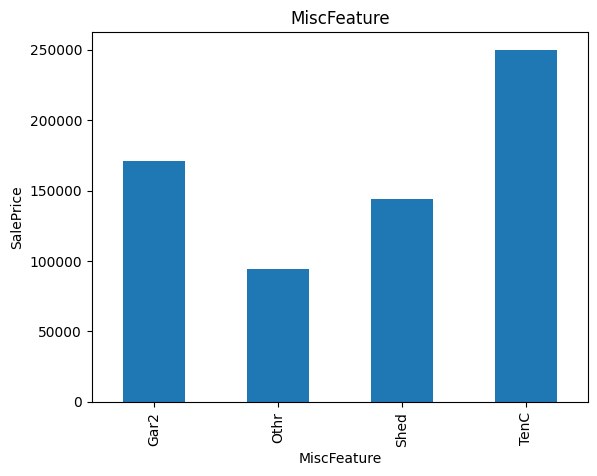

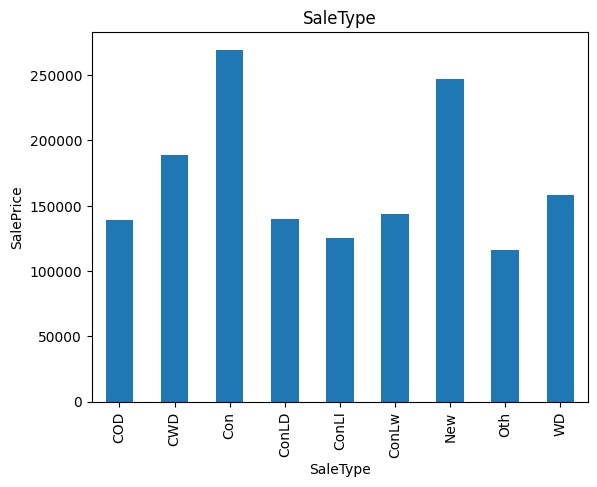

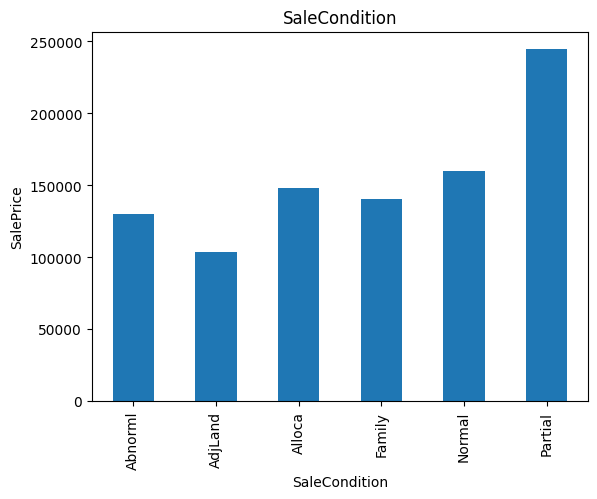

In [27]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Insights from the Bar Plots:

- Features like Neighborhood, ExterQual, and KitchenQual show strong patterns—some categories clearly correspond to higher or lower median house prices.

- These plots help identify important categorical variables that are strong predictors of house price.


----------------------------------------------------------------

--------------------------------------------------------------------

### ***Conclusion of EDA***

We explored the data thoroughly and identified key patterns:

- Missing values were found in several columns and will need handling.
- Temporal features like construction and remodel years were converted into age-related insights.
- Some discrete and categorical features (like OverallQual, Neighborhood, ExterQual) showed strong influence on house prices.
- Continuous features showed skewness and outliers, which we plan to address with log transformation and capping.
- This analysis gives us a clear direction for feature engineering, helping us prepare the dataset better for model building.